In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
# Convert 'Age' to numeric safely (in case of strings), then round
df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")


<Figure size 1000x600 with 0 Axes>

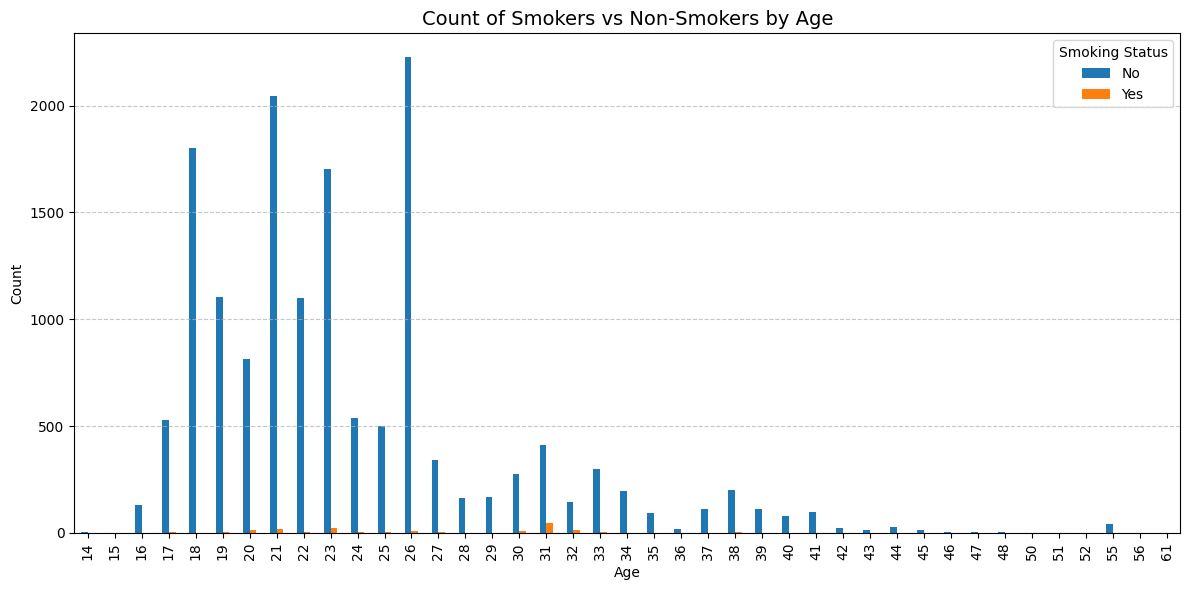

In [6]:
df["SMOKE"] = df["SMOKE"].astype(str).str.strip().str.lower()

# Compute counts of smokers and non-smokers by age
age_smoke_counts = df.groupby(["Age", "SMOKE"]).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
age_smoke_counts.plot(kind="bar", stacked=False, figsize=(12, 6))

plt.title("Count of Smokers vs Non-Smokers by Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Smoking Status", labels=["No", "Yes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

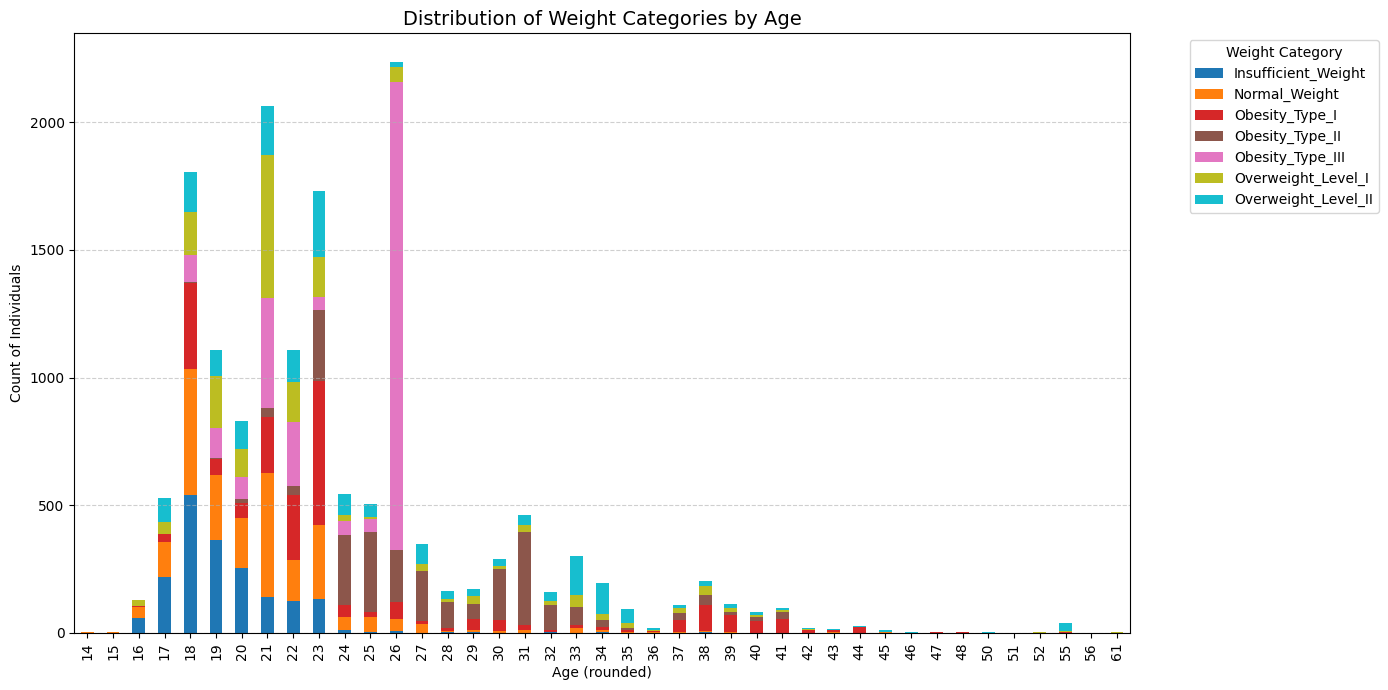

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("train.csv")

# Clean and round Age
df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# Ensure target column exists
target_col = "WeightCategory"
if target_col not in df.columns:
    raise KeyError(f"'{target_col}' not found in dataframe columns: {df.columns.tolist()}")

# Count how many samples per Age per WeightCategory
age_weight_counts = df.groupby(["Age", target_col]).size().unstack(fill_value=0)

# --- Plot (stacked bar chart) ---
plt.figure(figsize=(14, 7))
age_weight_counts.plot(kind="bar", stacked=True, colormap="tab10", figsize=(14, 7))

plt.title("Distribution of Weight Categories by Age", fontsize=14)
plt.xlabel("Age (rounded)")
plt.ylabel("Count of Individuals")
plt.legend(title="Weight Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

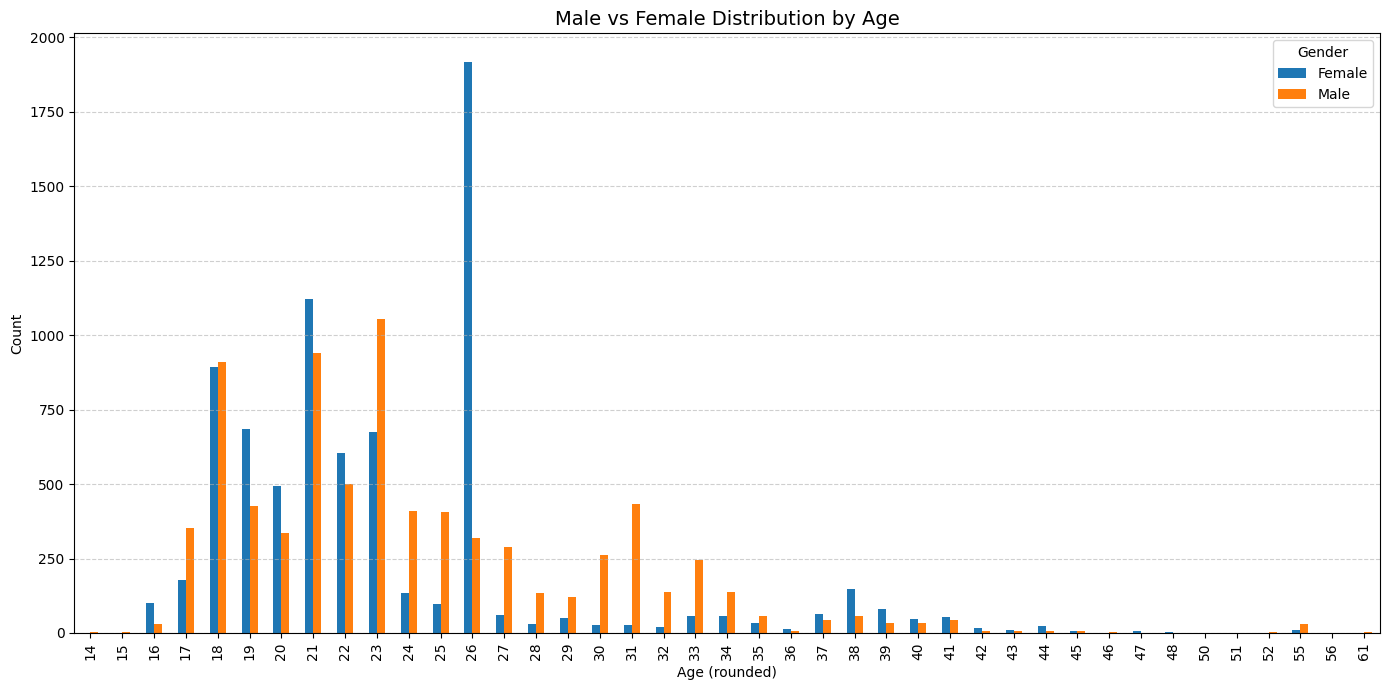

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")

# Round Age
df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# Detect Gender column
gender_col = None
for cand in ["Gender", "gender", "Sex", "sex"]:
    if cand in df.columns:
        gender_col = cand
        break
if gender_col is None:
    raise KeyError("No gender column found in dataset.")

# Standardize Gender values (M/F)
df[gender_col] = df[gender_col].astype(str).str.strip().str.lower().map({
    "male": "Male", "m": "Male", "1": "Male",
    "female": "Female", "f": "Female", "0": "Female"
}).fillna("Unknown")

# Group and count
age_gender_counts = df.groupby(["Age", gender_col]).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 7))
age_gender_counts.plot(kind="bar", figsize=(14, 7))

plt.title("Male vs Female Distribution by Age", fontsize=14)
plt.xlabel("Age (rounded)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

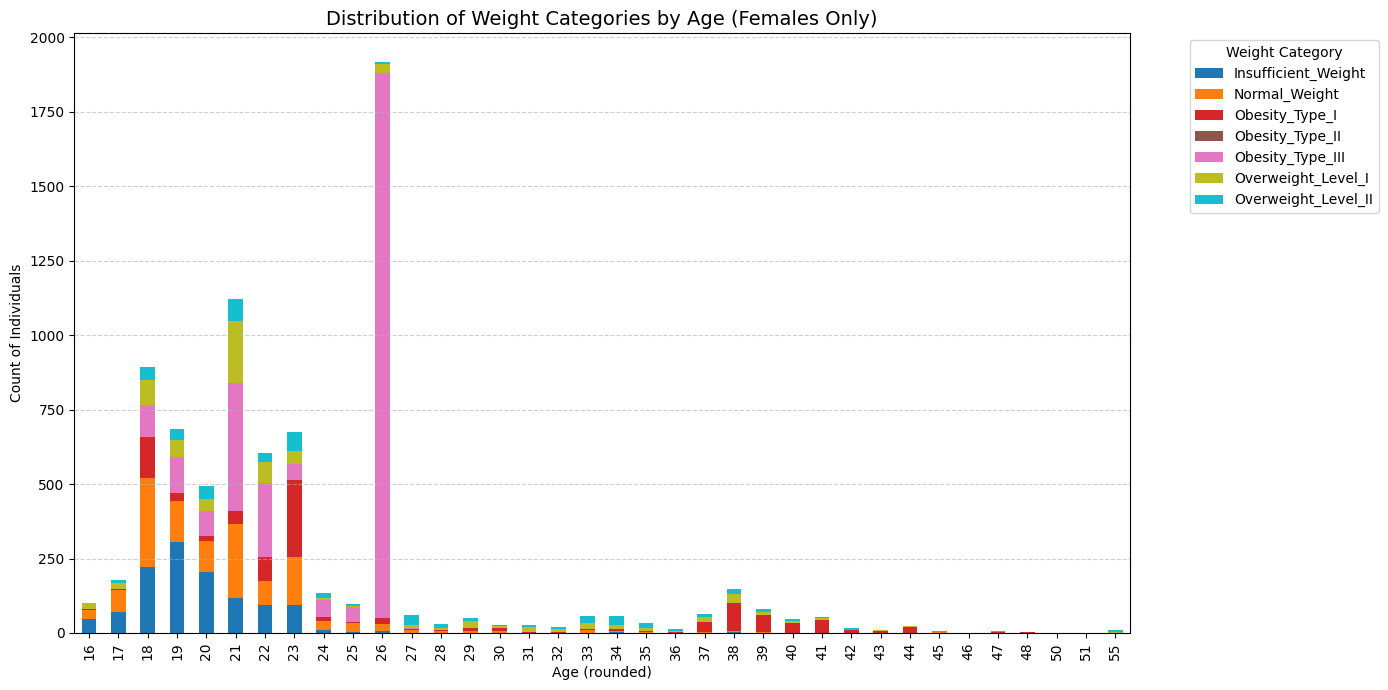

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")

# Round Age
df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# Detect Gender column
gender_col = None
for cand in ["Gender", "gender", "Sex", "sex"]:
    if cand in df.columns:
        gender_col = cand
        break
if gender_col is None:
    raise KeyError("No gender column found in dataset.")

# Standardize gender values
df[gender_col] = df[gender_col].astype(str).str.strip().str.lower()
female_df = df[df[gender_col].isin(["female", "f", "0"])].copy()

# Ensure target column exists
target_col = "WeightCategory"
if target_col not in female_df.columns:
    raise KeyError(f"'{target_col}' not found in dataframe columns: {female_df.columns.tolist()}")

# Count how many samples per Age per WeightCategory (for females only)
age_weight_counts = female_df.groupby(["Age", target_col]).size().unstack(fill_value=0)

# --- Plot (stacked bar chart) ---
plt.figure(figsize=(14, 7))
age_weight_counts.plot(kind="bar", stacked=True, colormap="tab10", figsize=(14, 7))

plt.title("Distribution of Weight Categories by Age (Females Only)", fontsize=14)
plt.xlabel("Age (rounded)")
plt.ylabel("Count of Individuals")
plt.legend(title="Weight Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

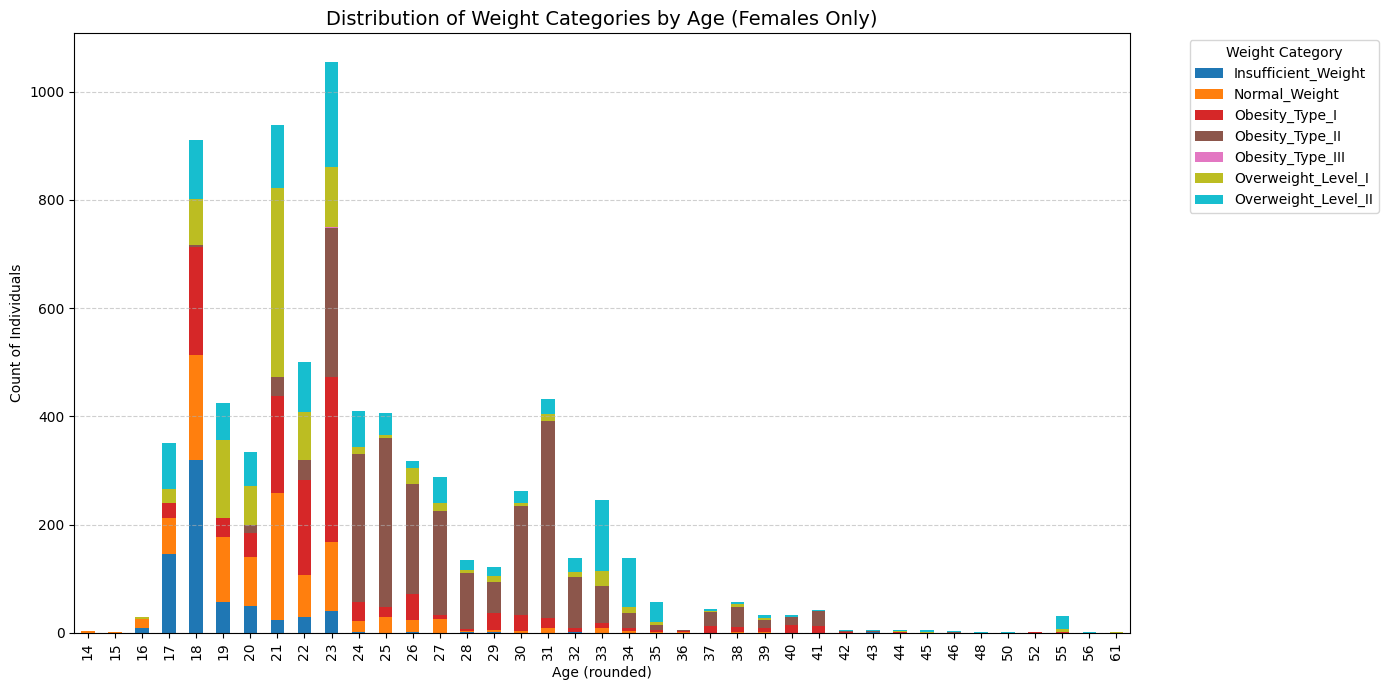

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")

# Round Age
df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# Detect Gender column
gender_col = None
for cand in ["Gender", "gender", "Sex", "sex"]:
    if cand in df.columns:
        gender_col = cand
        break
if gender_col is None:
    raise KeyError("No gender column found in dataset.")

# Standardize gender values
df[gender_col] = df[gender_col].astype(str).str.strip().str.lower()
female_df = df[df[gender_col].isin(["male", "m", "1"])].copy()

# Ensure target column exists
target_col = "WeightCategory"
if target_col not in female_df.columns:
    raise KeyError(f"'{target_col}' not found in dataframe columns: {female_df.columns.tolist()}")

# Count how many samples per Age per WeightCategory (for females only)
age_weight_counts = female_df.groupby(["Age", target_col]).size().unstack(fill_value=0)

# --- Plot (stacked bar chart) ---
plt.figure(figsize=(14, 7))
age_weight_counts.plot(kind="bar", stacked=True, colormap="tab10", figsize=(14, 7))

plt.title("Distribution of Weight Categories by Age (Females Only)", fontsize=14)
plt.xlabel("Age (rounded)")
plt.ylabel("Count of Individuals")
plt.legend(title="Weight Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
# ==============================================
# 4-way split (Gender × Age) XGB + engineered features + Kaggle_test eval
# ==============================================
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.base import clone
import xgboost as xgb

# -------- Paths --------
TRAIN_PATH = "train_combined.csv"
TEST_PATH = "test.csv"
SAMPLE_SUB_PATH = "sample_submission.csv"
KAGGLE_TEST_PATH = "Kaggle_test.csv"  # must contain WeightCategory ground truth

RANDOM_STATE = 42
N_FOLDS = 5
N_JOBS = -1

# -------- Helpers --------
def norm_col(s: str) -> str:
    if s is None: return s
    return str(s).replace("\ufeff", "").strip().lower()

def infer_feature_types(df):
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    return num_cols, cat_cols

def detect_gender_column(df):
    # common names
    for c in df.columns:
        if norm_col(c) in {"gender", "sex"}:
            return c
    # fallback: looks like M/F
    for c in df.columns:
        vals = pd.Series(df[c].dropna().astype(str).str.lower().str.strip()).unique()
        if len(vals) in (2, 3):
            if any(v.startswith("m") for v in vals) and any(v.startswith("f") for v in vals):
                return c
    return None

def split_by_gender(series):
    s = series.astype(str).str.lower().str.strip()
    male_mask = s.str.startswith(("m","1","true"))
    female_mask = s.str.startswith(("f","0","false"))
    if male_mask.sum()==0 and female_mask.sum()==0:
        top = s.value_counts().index.tolist()
        if len(top)>=2:
            male_mask = s==top[0]
            female_mask = s==top[1]
    return male_mask, female_mask

def add_bmi(df):
    """Compute BMI = Weight / (Height^2) directly, assuming Height is in meters."""
    if "Weight" in df.columns and "Height" in df.columns:
        df["BMI"] = (
            pd.to_numeric(df["Weight"], errors="coerce") /
            (pd.to_numeric(df["Height"], errors="coerce") ** 2)
        ).replace([np.inf, -np.inf], np.nan)
    return df


def safe_lower_str_col(s):
    return s.astype(str).str.strip().str.lower().where(s.notna(), other=np.nan)

def round_age_inplace(df):
    if "Age" in df.columns:
        df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# ===================== Load =====================
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)
sample_sub = pd.read_csv(SAMPLE_SUB_PATH)

# ============== Feature Engineering ==============
# Drop unwanted
for c in ["MTRANS","SMOKE"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# FAVC * FCVC
if "FAVC" in train.columns:
    train["FAVC_num"] = safe_lower_str_col(train["FAVC"]).map({"yes":1, "no":0})
if "FAVC" in test.columns:
    test["FAVC_num"]  = safe_lower_str_col(test["FAVC"]).map({"yes":1, "no":0})
if ("FAVC_num" in train.columns) and ("FCVC" in train.columns):
    train["favc_fcvc_interaction"] = pd.to_numeric(train["FAVC_num"], errors="coerce") * pd.to_numeric(train["FCVC"], errors="coerce")
if ("FAVC_num" in test.columns) and ("FCVC" in test.columns):
    test["favc_fcvc_interaction"]  = pd.to_numeric(test["FAVC_num"], errors="coerce")  * pd.to_numeric(test["FCVC"], errors="coerce")
for c in ["FAVC","FAVC_num","FCVC"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# activity_balance = FAF / (TUE + 1e-6); keep FAF, drop TUE
if ("FAF" in train.columns) and ("TUE" in train.columns):
    train["activity_balance"] = pd.to_numeric(train["FAF"], errors="coerce") / (pd.to_numeric(train["TUE"], errors="coerce") + 1e-6)
if ("FAF" in test.columns) and ("TUE" in test.columns):
    test["activity_balance"]  = pd.to_numeric(test["FAF"], errors="coerce")  / (pd.to_numeric(test["TUE"], errors="coerce")  + 1e-6)
for c in ["TUE"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# meal_balance = NCP * CAEC_num; drop NCP, CAEC
def map_caec(series):
    s = series.astype(str).str.strip().str.lower()
    return s.map({'no':0, 'sometimes':1, 'frequently':2, 'always':3})
if "CAEC" in train.columns:
    train["CAEC_num"] = map_caec(train["CAEC"])
if "CAEC" in test.columns:
    test["CAEC_num"]  = map_caec(test["CAEC"])
if ("NCP" in train.columns) and ("CAEC_num" in train.columns):
    train["meal_balance"] = pd.to_numeric(train["NCP"], errors="coerce") * pd.to_numeric(train["CAEC_num"], errors="coerce")
if ("NCP" in test.columns) and ("CAEC_num" in test.columns):
    test["meal_balance"]  = pd.to_numeric(test["NCP"], errors="coerce")  * pd.to_numeric(test["CAEC_num"], errors="coerce")
for c in ["NCP","CAEC"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# BMI
train = add_bmi(train)
test  = add_bmi(test)

# Age rounding (train/test)
round_age_inplace(train)
round_age_inplace(test)

print("[Info] Engineered features added & Age rounded.")

# -------- Detect ID/Target
id_col = None
for cand in ["id", "row_id", "index", "sample_id"]:
    if cand in train.columns and cand in test.columns:
        id_col = cand
        break

target_col = None
for cand in ["WeightCategory", "NObeyesdad", "label", "target", "class", "y"]:
    if cand in train.columns:
        target_col = cand
        break
if target_col is None:
    raise ValueError("Could not detect target column in train.csv")

# -------- Build X/y
y = train[target_col].copy()
X = train.drop(columns=[target_col]).copy()
if id_col and id_col in X.columns:
    X.drop(columns=[id_col], inplace=True)

test_features = test.copy()
if id_col and id_col in test_features.columns:
    test_ids = test_features[id_col].copy()
    test_features.drop(columns=[id_col], inplace=True)
else:
    test_ids = pd.Series(np.arange(len(test_features)), name="id")

# -------- Label encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = list(le.classes_)
print(f"[Info] Classes: {classes}")

# -------- Detect Gender col
gender_col = detect_gender_column(pd.concat([X, test_features], axis=0))
if gender_col is None:
    raise ValueError("Could not detect a gender column (e.g., 'Gender'/'SEX').")

# Masks for gender
male_mask, female_mask = split_by_gender(train[gender_col])
test_male_mask, test_female_mask = split_by_gender(test_features[gender_col])

# -------- Age thresholds & Group masks (4 groups)
# female: <=26 vs >26; male: <=22 vs >22
def age_leq(series, thr):
    a = pd.to_numeric(series, errors="coerce")
    return (a <= thr) | a.isna()  # NaN treated as <= (prevents dropping rows)

# TRAIN masks
f_leq = female_mask & age_leq(train["Age"], 26)
f_gt  = female_mask & (~age_leq(train["Age"], 26))
m_leq = male_mask   & age_leq(train["Age"], 22)
m_gt  = male_mask   & (~age_leq(train["Age"], 22))

# TEST masks
tf_leq = test_female_mask & age_leq(test_features["Age"], 26)
tf_gt  = test_female_mask & (~age_leq(test_features["Age"], 26))
tm_leq = test_male_mask   & age_leq(test_features["Age"], 22)
tm_gt  = test_male_mask   & (~age_leq(test_features["Age"], 22))

print(f"[Info] Group sizes (train): F<=26={int(f_leq.sum())}, F>26={int(f_gt.sum())}, M<=22={int(m_leq.sum())}, M>22={int(m_gt.sum())}")
print(f"[Info] Group sizes (test):  F<=26={int(tf_leq.sum())}, F>26={int(tf_gt.sum())}, M<=22={int(tm_leq.sum())}, M>22={int(tm_gt.sum())}")

# -------- XGB training per-group function
def train_group_and_predict(X_grp, y_enc_grp, test_grp, group_name):
    # drop gender col inside group (constant-ish after split)
    cols_to_use = [c for c in X_grp.columns if c != gender_col]
    Xg = X_grp[cols_to_use].copy()
    Xtestg = test_grp[cols_to_use].copy()

    num_cols, cat_cols = infer_feature_types(Xg)

    # Preprocessor
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=False))
    ])
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe)
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0
    )

    # XGB params
    xgb_params = {
        "objective": "multi:softprob",
        "num_class": len(classes),
        "eval_metric": "mlogloss",
        "tree_method": "hist",
        "max_depth": 6,
        "min_child_weight": 2,
        "subsample": 0.9,
        "colsample_bytree": 0.9,
        "lambda": 1.0,
        "alpha": 0.0,
        "eta": 0.03,
        "nthread": N_JOBS,
        "seed": RANDOM_STATE,
    }
    NUM_BOOST_ROUND = 20000
    EARLY_STOP = 200

    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    oof_group = np.zeros((len(Xg), len(classes)), dtype=np.float32)
    test_group_pred = np.zeros((len(Xtestg), len(classes)), dtype=np.float32)
    fold_best = []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(Xg, y_enc_grp), start=1):
        print(f"\n[{group_name}] Fold {fold}/{N_FOLDS}")
        X_tr, X_va = Xg.iloc[tr_idx], Xg.iloc[va_idx]
        y_tr, y_va = y_enc_grp[tr_idx], y_enc_grp[va_idx]

        prep = clone(preprocessor)
        Xtr = prep.fit_transform(X_tr)
        Xva = prep.transform(X_va)

        dtrain = xgb.DMatrix(Xtr, label=y_tr)
        dval   = xgb.DMatrix(Xva, label=y_va)

        bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=NUM_BOOST_ROUND,
            evals=[(dtrain, "train"), (dval, "valid")],
            early_stopping_rounds=EARLY_STOP,
            verbose_eval=False
        )
        best_round = int(bst.best_iteration + 1)
        fold_best.append(best_round)
        print(f"[{group_name}] Best iteration: {best_round}")

        # OOF fill
        oof_group[va_idx] = bst.predict(dval, iteration_range=(0, best_round))

        # Test preds
        Xtest_tf = prep.transform(Xtestg)
        dtest = xgb.DMatrix(Xtest_tf)
        test_group_pred += bst.predict(dtest, iteration_range=(0, best_round)) / N_FOLDS

    # Group OOF summary
    oof_labels = np.argmax(oof_group, axis=1)
    acc_g = accuracy_score(y_enc_grp, oof_labels)
    f1_g = f1_score(y_enc_grp, oof_labels, average="macro")
    print(f"\n[{group_name}] OOF Accuracy: {acc_g:.4f} | Macro F1: {f1_g:.4f}")
    print(f"[{group_name}] Best iterations: {fold_best} | Median: {int(np.median(fold_best))}")

    return oof_group, test_group_pred

# -------- Train per-group --------
groups = [
    ("FEMALE<=26", f_leq, tf_leq),
    ("FEMALE>26",  f_gt,  tf_gt ),
    ("MALE<=23",   m_leq, tm_leq),
    ("MALE>23",    m_gt,  tm_gt ),
]

oof_full = np.zeros((len(X), len(classes)), dtype=np.float32)
test_pred_proba = np.zeros((len(test_features), len(classes)), dtype=np.float32)

for gname, tr_mask, te_mask in groups:
    if tr_mask.sum() == 0:
        print(f"[{gname}] No training data; skipping.")
        continue
    Xg = X.loc[tr_mask].reset_index(drop=True)
    yg = y_enc[tr_mask]
    Xtg = test_features.loc[te_mask].reset_index(drop=True)

    oof_g, test_g = train_group_and_predict(Xg, yg, Xtg, gname)

    # place back
    oof_full[np.where(tr_mask)[0]] = oof_g
    test_pred_proba[np.where(te_mask)[0]] = test_g

# -------- OOF summary overall --------
oof_labels = np.argmax(oof_full, axis=1)
oof_acc = accuracy_score(y_enc, oof_labels)
oof_f1 = f1_score(y_enc, oof_labels, average="macro")
print("\n========== OVERALL OOF ==========")
print(f"OOF Accuracy: {oof_acc:.4f} | OOF Macro F1: {oof_f1:.4f}")
try:
    print("\nOOF Classification Report:\n",
          classification_report(y_enc, oof_labels, target_names=classes, zero_division=0))
except Exception as e:
    print(f"[Info] Could not print classification report: {e}")

# -------- Build submission from test_pred_proba --------
test_pred_int = np.argmax(test_pred_proba, axis=1)
test_pred_labels = le.inverse_transform(test_pred_int)

ss_cols = list(sample_sub.columns)
ID_HEADER = None
LABEL_HEADER = None
if len(ss_cols) == 2:
    c1, c2 = ss_cols
    if c1 in test.columns and c2 not in test.columns:
        ID_HEADER, LABEL_HEADER = c1, c2
    elif c2 in test.columns and c1 not in test.columns:
        ID_HEADER, LABEL_HEADER = c2, c1
if ID_HEADER is None:
    ID_HEADER = ss_cols[0]
    LABEL_HEADER = ss_cols[1]

sub = pd.DataFrame()
if ID_HEADER in test.columns:
    sub[ID_HEADER] = test[ID_HEADER].values
else:
    sub[ID_HEADER] = np.arange(len(test_features))
sub[LABEL_HEADER] = test_pred_labels
for c in ss_cols:
    if c not in sub.columns:
        sub[c] = sample_sub[c].iloc[0] if len(sample_sub[c]) else None
sub = sub[ss_cols]
sub.to_csv("submission.csv", index=False)
print("\nSaved submission.csv")
print(sub.head(5))

[Info] Engineered features added & Age rounded.
[Info] Classes: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
[Info] Group sizes (train): F<=26=7773, F>26=1020, M<=22=3964, M>22=4887
[Info] Group sizes (test):  F<=26=9313, F>26=1109, M<=22=4614, M>22=5722

[FEMALE<=26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE<=26] Best iteration: 391

[FEMALE<=26] Fold 2/5
[FEMALE<=26] Best iteration: 244

[FEMALE<=26] Fold 3/5
[FEMALE<=26] Best iteration: 312

[FEMALE<=26] Fold 4/5
[FEMALE<=26] Best iteration: 278

[FEMALE<=26] Fold 5/5
[FEMALE<=26] Best iteration: 340

[FEMALE<=26] OOF Accuracy: 0.9343 | Macro F1: 0.7621
[FEMALE<=26] Best iterations: [391, 244, 312, 278, 340] | Median: 312

[FEMALE>26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26] Best iteration: 220

[FEMALE>26] Fold 2/5
[FEMALE>26] Best iteration: 218

[FEMALE>26] Fold 3/5
[FEMALE>26] Best iteration: 226

[FEMALE>26] Fold 4/5
[FEMALE>26] Best iteration: 244

[FEMALE>26] Fold 5/5
[FEMALE>26] Best iteration: 180

[FEMALE>26] OOF Accuracy: 0.8382 | Macro F1: 0.5785
[FEMALE>26] Best iterations: [220, 218, 226, 244, 180] | Median: 220

[MALE<=23] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=23] Best iteration: 268

[MALE<=23] Fold 2/5
[MALE<=23] Best iteration: 257

[MALE<=23] Fold 3/5
[MALE<=23] Best iteration: 294

[MALE<=23] Fold 4/5
[MALE<=23] Best iteration: 291

[MALE<=23] Fold 5/5
[MALE<=23] Best iteration: 289

[MALE<=23] OOF Accuracy: 0.8683 | Macro F1: 0.7378
[MALE<=23] Best iterations: [268, 257, 294, 291, 289] | Median: 289

[MALE>23] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>23] Best iteration: 306

[MALE>23] Fold 2/5
[MALE>23] Best iteration: 213

[MALE>23] Fold 3/5
[MALE>23] Best iteration: 278

[MALE>23] Fold 4/5
[MALE>23] Best iteration: 288

[MALE>23] Fold 5/5
[MALE>23] Best iteration: 297

[MALE>23] OOF Accuracy: 0.9079 | Macro F1: 0.7327
[MALE>23] Best iterations: [306, 213, 278, 288, 297] | Median: 288

========== OVERALL OOF ==========
OOF Accuracy: 0.9066 | OOF Macro F1: 0.8986

OOF Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93      2142
      Normal_Weight       0.88      0.89      0.88      2632
     Obesity_Type_I       0.90      0.89      0.89      2558
    Obesity_Type_II       0.96      0.97      0.97      2700
   Obesity_Type_III       1.00      1.00      1.00      3307
 Overweight_Level_I       0.81      0.79      0.80      2134
Overweight_Level_II       0.82      0.82      0.82      2171

           accuracy                           0.91    

In [25]:
# ==============================================
# Evaluate on Kaggle_test.csv (with ground truth)
# ==============================================
kdf = pd.read_csv(KAGGLE_TEST_PATH)
if "WeightCategory" not in kdf.columns:
    raise KeyError("Kaggle_test.csv must contain 'WeightCategory'.")

y_true = kdf["WeightCategory"].copy()
X_k = kdf.drop(columns=["WeightCategory"], errors="ignore").copy()
if id_col and id_col in X_k.columns:
    X_k.drop(columns=[id_col], inplace=True)

# Apply SAME feature engineering + rounding to Kaggle_test
for c in ["MTRANS","SMOKE"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)

if "FAVC" in X_k.columns:
    X_k["FAVC_num"] = safe_lower_str_col(X_k["FAVC"]).map({"yes":1,"no":0})
if ("FAVC_num" in X_k.columns) and ("FCVC" in X_k.columns):
    X_k["favc_fcvc_interaction"] = pd.to_numeric(X_k["FAVC_num"], errors="coerce") * pd.to_numeric(X_k["FCVC"], errors="coerce")
for c in ["FAVC","FAVC_num","FCVC"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)

if ("FAF" in X_k.columns) and ("TUE" in X_k.columns):
    X_k["activity_balance"] = pd.to_numeric(X_k["FAF"], errors="coerce") / (pd.to_numeric(X_k["TUE"], errors="coerce") + 1e-6)
if "TUE" in X_k.columns: X_k.drop(columns=["TUE"], inplace=True)

if "CAEC" in X_k.columns:
    X_k["CAEC_num"] = map_caec(X_k["CAEC"])
if ("NCP" in X_k.columns) and ("CAEC_num" in X_k.columns):
    X_k["meal_balance"] = pd.to_numeric(X_k["NCP"], errors="coerce") * pd.to_numeric(X_k["CAEC_num"], errors="coerce")
for c in ["NCP","CAEC"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)

X_k = add_bmi(X_k)
round_age_inplace(X_k)

# gender detection on Kaggle_test
gender_col_k = detect_gender_column(X_k)
if gender_col_k is None:
    raise ValueError("Could not detect a gender column in Kaggle_test.csv")
km_k, kf_k = split_by_gender(X_k[gender_col_k])

# Build 4 Kaggle masks using same thresholds
kf_leq = kf_k & ((pd.to_numeric(X_k["Age"], errors="coerce") <= 26) | X_k["Age"].isna())
kf_gt  = kf_k & (~((pd.to_numeric(X_k["Age"], errors="coerce") <= 26) | X_k["Age"].isna()))
km_leq = km_k & ((pd.to_numeric(X_k["Age"], errors="coerce") <= 23) | X_k["Age"].isna())
km_gt  = km_k & (~((pd.to_numeric(X_k["Age"], errors="coerce") <= 23) | X_k["Age"].isna()))

# For Kaggle preds, reuse the same CV training function per group (train on full group and predict on subset)
def predict_kaggle_for_group(X_train_grp, y_train_grp, X_k_grp, name):
    if len(X_k_grp) == 0 or len(X_train_grp) == 0:
        return np.zeros((len(X_k_grp), len(classes)), dtype=np.float32)
    oof_g, pred_g = train_group_and_predict(X_train_grp.reset_index(drop=True),
                                            y_train_grp,
                                            X_k_grp.reset_index(drop=True),
                                            f"{name} (Kaggle)")
    return pred_g

# Prepare training groups from X based on earlier masks
def select_cols(df, mask):
    return df.loc[mask].reset_index(drop=True)

X_f_leq, y_f_leq = select_cols(X, f_leq), y_enc[f_leq]
X_f_gt,  y_f_gt  = select_cols(X, f_gt),  y_enc[f_gt]
X_m_leq, y_m_leq = select_cols(X, m_leq), y_enc[m_leq]
X_m_gt,  y_m_gt  = select_cols(X, m_gt),  y_enc[m_gt]

# Kaggle group frames
Xk_f_leq = select_cols(X_k, kf_leq)
Xk_f_gt  = select_cols(X_k, kf_gt)
Xk_m_leq = select_cols(X_k, km_leq)
Xk_m_gt  = select_cols(X_k, km_gt)

# Predict
kaggle_pred_proba = np.zeros((len(X_k), len(classes)), dtype=np.float32)
if len(Xk_f_leq) > 0: kaggle_pred_proba[kf_leq.values] = predict_kaggle_for_group(X_f_leq, y_f_leq, Xk_f_leq, "FEMALE<=26")
if len(Xk_f_gt)  > 0: kaggle_pred_proba[kf_gt.values]  = predict_kaggle_for_group(X_f_gt,  y_f_gt,  Xk_f_gt,  "FEMALE>26")
if len(Xk_m_leq) > 0: kaggle_pred_proba[km_leq.values] = predict_kaggle_for_group(X_m_leq, y_m_leq, Xk_m_leq, "MALE<=23")
if len(Xk_m_gt)  > 0: kaggle_pred_proba[km_gt.values]  = predict_kaggle_for_group(X_m_gt,  y_m_gt,  Xk_m_gt,  "MALE>23")

kaggle_pred_idx = np.argmax(kaggle_pred_proba, axis=1)
y_pred = le.inverse_transform(kaggle_pred_idx)


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



[FEMALE<=26 (Kaggle)] Fold 1/5
[FEMALE<=26 (Kaggle)] Best iteration: 391

[FEMALE<=26 (Kaggle)] Fold 2/5
[FEMALE<=26 (Kaggle)] Best iteration: 244

[FEMALE<=26 (Kaggle)] Fold 3/5
[FEMALE<=26 (Kaggle)] Best iteration: 312

[FEMALE<=26 (Kaggle)] Fold 4/5
[FEMALE<=26 (Kaggle)] Best iteration: 278

[FEMALE<=26 (Kaggle)] Fold 5/5
[FEMALE<=26 (Kaggle)] Best iteration: 340

[FEMALE<=26 (Kaggle)] OOF Accuracy: 0.9343 | Macro F1: 0.7621
[FEMALE<=26 (Kaggle)] Best iterations: [391, 244, 312, 278, 340] | Median: 312

[FEMALE>26 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26 (Kaggle)] Best iteration: 220

[FEMALE>26 (Kaggle)] Fold 2/5
[FEMALE>26 (Kaggle)] Best iteration: 218

[FEMALE>26 (Kaggle)] Fold 3/5
[FEMALE>26 (Kaggle)] Best iteration: 226

[FEMALE>26 (Kaggle)] Fold 4/5
[FEMALE>26 (Kaggle)] Best iteration: 244

[FEMALE>26 (Kaggle)] Fold 5/5
[FEMALE>26 (Kaggle)] Best iteration: 180

[FEMALE>26 (Kaggle)] OOF Accuracy: 0.8382 | Macro F1: 0.5785
[FEMALE>26 (Kaggle)] Best iterations: [220, 218, 226, 244, 180] | Median: 220

[MALE<=23 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=23 (Kaggle)] Best iteration: 268

[MALE<=23 (Kaggle)] Fold 2/5
[MALE<=23 (Kaggle)] Best iteration: 257

[MALE<=23 (Kaggle)] Fold 3/5
[MALE<=23 (Kaggle)] Best iteration: 294

[MALE<=23 (Kaggle)] Fold 4/5
[MALE<=23 (Kaggle)] Best iteration: 291

[MALE<=23 (Kaggle)] Fold 5/5
[MALE<=23 (Kaggle)] Best iteration: 289

[MALE<=23 (Kaggle)] OOF Accuracy: 0.8683 | Macro F1: 0.7378
[MALE<=23 (Kaggle)] Best iterations: [268, 257, 294, 291, 289] | Median: 289

[MALE>23 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>23 (Kaggle)] Best iteration: 306

[MALE>23 (Kaggle)] Fold 2/5
[MALE>23 (Kaggle)] Best iteration: 213

[MALE>23 (Kaggle)] Fold 3/5
[MALE>23 (Kaggle)] Best iteration: 278

[MALE>23 (Kaggle)] Fold 4/5
[MALE>23 (Kaggle)] Best iteration: 288

[MALE>23 (Kaggle)] Fold 5/5
[MALE>23 (Kaggle)] Best iteration: 297

[MALE>23 (Kaggle)] OOF Accuracy: 0.9079 | Macro F1: 0.7327
[MALE>23 (Kaggle)] Best iterations: [306, 213, 278, 288, 297] | Median: 288


In [26]:
# -------- Accuracy to 5 decimals --------
overall_acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Overall Accuracy on Kaggle_test: {overall_acc:.5f}")

# -------- Confusion matrix + report --------
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
cm = confusion_matrix(y_true, y_pred, labels=order)
cm_norm = cm.astype(float) / (cm.sum(axis=1, keepdims=True) + 1e-12)

print("\n=== Confusion Matrix (counts) ===")
print("Predicted →")
print("True ↓")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm[i, j]:4d}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Confusion Matrix (row-normalized) ===")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm_norm[i, j]:.2f}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Per-class metrics ===")
try:
    print(classification_report(y_true, y_pred, labels=order, target_names=order, digits=4, zero_division=0))
except Exception as e:
    print(f"[Info] classification_report fallback: {e}")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))


✅ Overall Accuracy on Kaggle_test: 0.90794

=== Confusion Matrix (counts) ===
Predicted →
True ↓
Insufficient_Weight   :  618 |   32 |    3 |    0 |    0 |    0 |    0
Normal_Weight         :   40 |  664 |   30 |    2 |    1 |    0 |    0
Overweight_Level_I    :    4 |   66 |  443 |   60 |   10 |    0 |    0
Overweight_Level_II   :    0 |   16 |   59 |  516 |   46 |    4 |    0
Obesity_Type_I        :    1 |    1 |   15 |   39 |  629 |   16 |    2
Obesity_Type_II       :    0 |    0 |    1 |    3 |   27 |  814 |    0
Obesity_Type_III      :    0 |    0 |    1 |    0 |    1 |    1 | 1060

=== Confusion Matrix (row-normalized) ===
Insufficient_Weight   : 0.95 | 0.05 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00
Normal_Weight         : 0.05 | 0.90 | 0.04 | 0.00 | 0.00 | 0.00 | 0.00
Overweight_Level_I    : 0.01 | 0.11 | 0.76 | 0.10 | 0.02 | 0.00 | 0.00
Overweight_Level_II   : 0.00 | 0.02 | 0.09 | 0.80 | 0.07 | 0.01 | 0.00
Obesity_Type_I        : 0.00 | 0.00 | 0.02 | 0.06 | 0.89 | 0.02 | 0.00
Obesity

In [27]:
import numpy as np
import pandas as pd

# --- Standardize gender on Kaggle_test ---
gcol = gender_col_k  # detected earlier
graw = X_k[gcol].astype(str).str.strip().str.lower()
gender_std = np.where(
    graw.str.startswith(("m","1","true")), "Male",
    np.where(graw.str.startswith(("f","0","false")), "Female", "Unknown")
)

eval_df = pd.DataFrame({
    "true": y_true.values,
    "pred": y_pred,
    "Gender": gender_std
})

# --- Masks for the two misclassification directions ---
mask_1to2 = (eval_df["true"] == "Overweight_Level_I")  & (eval_df["pred"] == "Overweight_Level_II")
mask_2to1 = (eval_df["true"] == "Overweight_Level_II") & (eval_df["pred"] == "Overweight_Level_I")

# Raw counts by gender
counts_1to2 = eval_df.loc[mask_1to2].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)
counts_2to1 = eval_df.loc[mask_2to1].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)

# Denominators to compute misclassification *rates* (how often true class gets flipped to the other one)
base_1 = eval_df.loc[eval_df["true"] == "Overweight_Level_I"].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)
base_2 = eval_df.loc[eval_df["true"] == "Overweight_Level_II"].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)

rates_1to2 = (counts_1to2 / base_1.replace(0, np.nan)).fillna(0)  # fraction of OLI misclassified as OLII
rates_2to1 = (counts_2to1 / base_2.replace(0, np.nan)).fillna(0)  # fraction of OLII misclassified as OLI

# Neat summary table
summary = pd.DataFrame({
    ("OLI → OLII", "count"): counts_1to2,
    ("OLI → OLII", "rate"):  rates_1to2.map(lambda x: f"{x*100:.1f}%"),
    ("OLII → OLI", "count"): counts_2to1,
    ("OLII → OLI", "rate"):  rates_2to1.map(lambda x: f"{x*100:.1f}%"),
})
summary.index.name = "Gender"

print("\n=== Misclassification between Overweight I and II by Gender (Kaggle_test) ===")
print(summary)



=== Misclassification between Overweight I and II by Gender (Kaggle_test) ===
        OLI → OLII        OLII → OLI       
             count   rate      count   rate
Gender                                     
Male            38  12.4%         37   8.4%
Female          22   7.9%         22  11.1%
Unknown          0   0.0%          0   0.0%


In [29]:
# Identify ID column automatically (like in your training code)
id_candidates = ["id", "row_id", "index", "sample_id"]
id_col_k = next((c for c in id_candidates if c in X_k.columns), None)

# --- Mask for misclassified rows (Overweight_Level_I ↔ Overweight_Level_II) ---
mis_mask = (
    ((eval_df["true"] == "Overweight_Level_I") & (eval_df["pred"] == "Overweight_Level_II")) |
    ((eval_df["true"] == "Overweight_Level_II") & (eval_df["pred"] == "Overweight_Level_I"))
)

mis_idx = eval_df.loc[mis_mask].index

# --- Extract full misclassified rows from Kaggle_test ---
mis_full = X_k.loc[mis_idx].copy()

# Add true/pred/Gender info
mis_full["True_Label"] = eval_df.loc[mis_idx, "true"].values
mis_full["Pred_Label"] = eval_df.loc[mis_idx, "pred"].values
mis_full["Gender_Std"] = eval_df.loc[mis_idx, "Gender"].values

# --- Optional: reorder columns so labels & gender are visible first ---
label_cols = ["True_Label", "Pred_Label", "Gender_Std"]
other_cols = [c for c in mis_full.columns if c not in label_cols]
mis_full = mis_full[label_cols + other_cols]

print(f"\n=== Total Misclassified Overweight I ↔ II Rows: {len(mis_full)} ===")

# Show first 10 complete rows
print(mis_full.head(10).to_string(index=False))

# --- Optional: save all full rows for manual review ---
mis_full.to_csv("misclassified_overweight_I_II_full.csv", index=False)
print("\nSaved full misclassified rows to: misclassified_overweight_I_II_full.csv")



=== Total Misclassified Overweight I ↔ II Rows: 119 ===
         True_Label          Pred_Label Gender_Std Gender  Age   Height    Weight family_history_with_overweight     CH2O SCC      FAF      CALC  favc_fcvc_interaction  activity_balance  CAEC_num  meal_balance       BMI
Overweight_Level_II  Overweight_Level_I     Female Female   24 1.724268 80.000000                            yes 2.000000  no 2.000000 Sometimes               3.000000         18.879145         1      3.000000 26.907940
 Overweight_Level_I Overweight_Level_II       Male   Male   29 1.830000 84.000000                            yes 2.000000  no 1.000000 Sometimes               0.000000    1000000.000000         2      6.000000 25.082863
 Overweight_Level_I Overweight_Level_II     Female Female   18 1.700000 80.000000                            yes 1.000000  no 1.000000        no               2.000000          0.999999         1      3.000000 27.681661
Overweight_Level_II  Overweight_Level_I     Female Female   22 

In [28]:
# --- Identify misclassified rows (Overweight_Level_I ↔ Overweight_Level_II) ---
mis_mask = (
    ((eval_df["true"] == "Overweight_Level_I") & (eval_df["pred"] == "Overweight_Level_II")) |
    ((eval_df["true"] == "Overweight_Level_II") & (eval_df["pred"] == "Overweight_Level_I"))
)

mis_df = eval_df.loc[mis_mask].copy()

# Attach the original features (like Age, BMI, etc.) for context
if "BMI" in X_k.columns:
    mis_df["BMI"] = X_k.loc[mis_df.index, "BMI"]
if "Age" in X_k.columns:
    mis_df["Age"] = X_k.loc[mis_df.index, "Age"]
if gcol in X_k.columns:
    mis_df[gcol] = X_k.loc[mis_df.index, gcol]

# Display summary of how many per direction
print(f"\nTotal misclassified Overweight I ↔ II rows: {len(mis_df)}")
print(f"  Overweight I → II : {(mis_df['true'] == 'Overweight_Level_I').sum()}")
print(f"  Overweight II → I : {(mis_df['true'] == 'Overweight_Level_II').sum()}")

# Show top 10 misclassified rows
cols_to_show = ["true", "pred", "Gender", "Age", "BMI", gcol]
cols_to_show = [c for c in cols_to_show if c in mis_df.columns]

print("\n=== Sample of Misclassified Overweight I ↔ II Rows (Top 10) ===")
print(mis_df[cols_to_show].head(10).to_string(index=False))



Total misclassified Overweight I ↔ II rows: 119
  Overweight I → II : 60
  Overweight II → I : 59

=== Sample of Misclassified Overweight I ↔ II Rows (Top 10) ===
               true                pred Gender  Age       BMI Gender
Overweight_Level_II  Overweight_Level_I Female   24 26.907940 Female
 Overweight_Level_I Overweight_Level_II   Male   29 25.082863   Male
 Overweight_Level_I Overweight_Level_II Female   18 27.681661 Female
Overweight_Level_II  Overweight_Level_I Female   22 25.711662 Female
 Overweight_Level_I Overweight_Level_II   Male   33 28.719723   Male
 Overweight_Level_I Overweight_Level_II   Male   22 29.119573   Male
 Overweight_Level_I Overweight_Level_II   Male   33 28.014532   Male
Overweight_Level_II  Overweight_Level_I Female   38 22.449625 Female
Overweight_Level_II  Overweight_Level_I   Male   18 27.494807   Male
 Overweight_Level_I Overweight_Level_II   Male   19 27.335640   Male


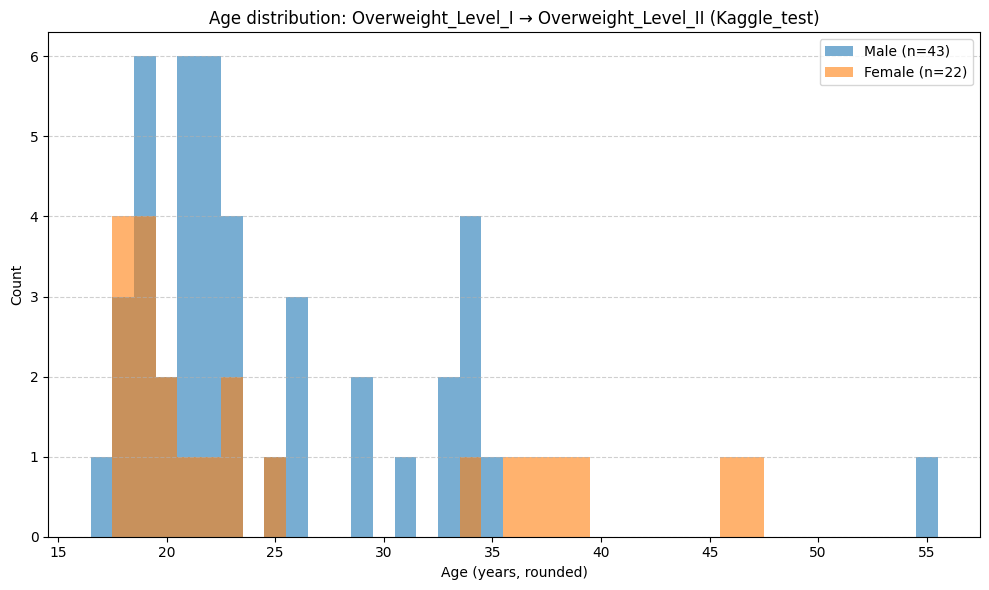

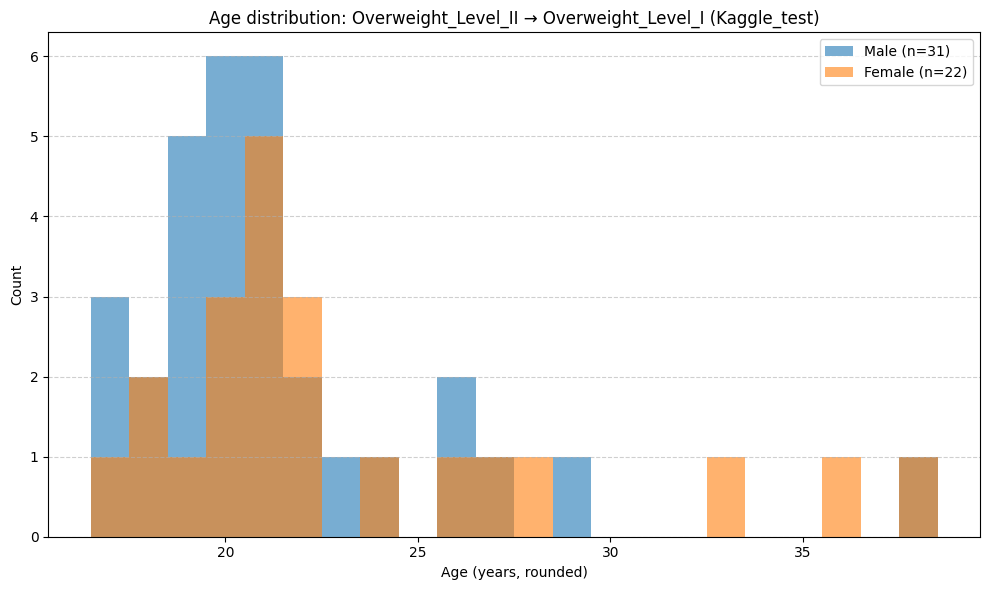

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Build a working frame with Age (rounded) for the Kaggle_test rows ---
# If you already rounded Age in X_k earlier, this will just coerce safely.
age_series = pd.to_numeric(X_k.get("Age", np.nan), errors="coerce").dropna()

# Attach Age back to eval_df (align by index)
eval_df_with_age = eval_df.copy()
eval_df_with_age["Age"] = pd.to_numeric(X_k["Age"], errors="coerce")

# Helper to plot one direction with gender overlays
def plot_age_distribution(eval_frame, true_label, pred_label, title_suffix):
    sub = eval_frame[(eval_frame["true"] == true_label) & (eval_frame["pred"] == pred_label)].copy()
    sub = sub.dropna(subset=["Age"])  # keep rows with known age
    if sub.empty:
        print(f"[Info] No rows for {true_label} → {pred_label}; skipping plot.")
        return

    # Split by gender (only Male/Female shown; Unknown dropped from plot)
    male_age = sub.loc[sub["Gender"] == "Male", "Age"].values
    female_age = sub.loc[sub["Gender"] == "Female", "Age"].values

    # Choose common bin edges to compare distributions fairly
    all_vals = np.concatenate([male_age, female_age]) if len(female_age) > 0 else male_age
    bins = np.arange(np.nanmin(all_vals), np.nanmax(all_vals) + 2) - 0.5  # 1-year bins centered on ints

    plt.figure(figsize=(10, 6))
    if len(male_age) > 0:
        plt.hist(male_age, bins=bins, alpha=0.6, label=f"Male (n={len(male_age)})", density=False)
    if len(female_age) > 0:
        plt.hist(female_age, bins=bins, alpha=0.6, label=f"Female (n={len(female_age)})", density=False)

    plt.title(f"Age distribution: {true_label} → {pred_label} {title_suffix}")
    plt.xlabel("Age (years, rounded)")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# --- Plots for both misclassification directions ---
plot_age_distribution(eval_df_with_age, "Overweight_Level_I",  "Overweight_Level_II", "(Kaggle_test)")
plot_age_distribution(eval_df_with_age, "Overweight_Level_II", "Overweight_Level_I",  "(Kaggle_test)")


In [30]:
# ==============================================
# 5-way split (Female<26, Female=26, Female>26, Male<=22, Male>22)
# XGB + engineered features + Kaggle_test eval
# ==============================================
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.base import clone
import xgboost as xgb

# -------- Paths --------
TRAIN_PATH = "train_combined.csv"
TEST_PATH = "test.csv"
SAMPLE_SUB_PATH = "sample_submission.csv"
KAGGLE_TEST_PATH = "Kaggle_test.csv"  # must contain WeightCategory ground truth

RANDOM_STATE = 42
N_FOLDS = 5
N_JOBS = -1

# -------- Helpers --------
def norm_col(s: str) -> str:
    if s is None: return s
    return str(s).replace("\ufeff", "").strip().lower()

def infer_feature_types(df):
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    return num_cols, cat_cols

def detect_gender_column(df):
    # common names
    for c in df.columns:
        if norm_col(c) in {"gender", "sex"}:
            return c
    # fallback: looks like M/F
    for c in df.columns:
        vals = pd.Series(df[c].dropna().astype(str).str.lower().str.strip()).unique()
        if len(vals) in (2, 3):
            if any(v.startswith("m") for v in vals) and any(v.startswith("f") for v in vals):
                return c
    return None

def split_by_gender(series):
    s = series.astype(str).str.lower().str.strip()
    male_mask = s.str.startswith(("m","1","true"))
    female_mask = s.str.startswith(("f","0","false"))
    if male_mask.sum()==0 and female_mask.sum()==0:
        top = s.value_counts().index.tolist()
        if len(top)>=2:
            male_mask = s==top[0]
            female_mask = s==top[1]
    return male_mask, female_mask

def add_bmi(df):
    """Compute BMI = Weight / (Height^2) directly (Height assumed in meters)."""
    if "Weight" in df.columns and "Height" in df.columns:
        num_w = pd.to_numeric(df["Weight"], errors="coerce")
        num_h = pd.to_numeric(df["Height"], errors="coerce")
        df["BMI"] = (num_w / (num_h ** 2)).replace([np.inf, -np.inf], np.nan)
    return df

def safe_lower_str_col(s):
    return s.astype(str).str.strip().str.lower().where(s.notna(), other=np.nan)

def round_age_inplace(df):
    if "Age" in df.columns:
        df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# ===================== Load =====================
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)
sample_sub = pd.read_csv(SAMPLE_SUB_PATH)

# ============== Feature Engineering ==============
# Drop unwanted
for c in ["MTRANS","SMOKE"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# FAVC * FCVC
if "FAVC" in train.columns:
    train["FAVC_num"] = safe_lower_str_col(train["FAVC"]).map({"yes":1, "no":0})
if "FAVC" in test.columns:
    test["FAVC_num"]  = safe_lower_str_col(test["FAVC"]).map({"yes":1, "no":0})
if ("FAVC_num" in train.columns) and ("FCVC" in train.columns):
    train["favc_fcvc_interaction"] = pd.to_numeric(train["FAVC_num"], errors="coerce") * pd.to_numeric(train["FCVC"], errors="coerce")
if ("FAVC_num" in test.columns) and ("FCVC" in test.columns):
    test["favc_fcvc_interaction"]  = pd.to_numeric(test["FAVC_num"], errors="coerce")  * pd.to_numeric(test["FCVC"], errors="coerce")
for c in ["FAVC","FAVC_num","FCVC"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# activity_balance = FAF / (TUE + 1e-6); keep FAF, drop TUE
if ("FAF" in train.columns) and ("TUE" in train.columns):
    train["activity_balance"] = pd.to_numeric(train["FAF"], errors="coerce") / (pd.to_numeric(train["TUE"], errors="coerce") + 1e-6)
if ("FAF" in test.columns) and ("TUE" in test.columns):
    test["activity_balance"]  = pd.to_numeric(test["FAF"], errors="coerce")  / (pd.to_numeric(test["TUE"], errors="coerce")  + 1e-6)
for c in ["TUE"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# meal_balance = NCP * CAEC_num; drop NCP, CAEC
def map_caec(series):
    s = series.astype(str).str.strip().str.lower()
    return s.map({'no':0, 'sometimes':1, 'frequently':2, 'always':3})
if "CAEC" in train.columns:
    train["CAEC_num"] = map_caec(train["CAEC"])
if "CAEC" in test.columns:
    test["CAEC_num"]  = map_caec(test["CAEC"])
if ("NCP" in train.columns) and ("CAEC_num" in train.columns):
    train["meal_balance"] = pd.to_numeric(train["NCP"], errors="coerce") * pd.to_numeric(train["CAEC_num"], errors="coerce")
if ("NCP" in test.columns) and ("CAEC_num" in test.columns):
    test["meal_balance"]  = pd.to_numeric(test["NCP"], errors="coerce")  * pd.to_numeric(test["CAEC_num"], errors="coerce")
for c in ["NCP","CAEC"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

# BMI
train = add_bmi(train)
test  = add_bmi(test)

# Age rounding (train/test)
round_age_inplace(train)
round_age_inplace(test)

print("[Info] Engineered features added & Age rounded.")

# -------- Detect ID/Target
id_col = None
for cand in ["id", "row_id", "index", "sample_id"]:
    if cand in train.columns and cand in test.columns:
        id_col = cand
        break

target_col = None
for cand in ["WeightCategory", "NObeyesdad", "label", "target", "class", "y"]:
    if cand in train.columns:
        target_col = cand
        break
if target_col is None:
    raise ValueError("Could not detect target column in train.csv")

# -------- Build X/y
y = train[target_col].copy()
X = train.drop(columns=[target_col]).copy()
if id_col and id_col in X.columns:
    X.drop(columns=[id_col], inplace=True)

test_features = test.copy()
if id_col and id_col in test_features.columns:
    test_ids = test_features[id_col].copy()
    test_features.drop(columns=[id_col], inplace=True)
else:
    test_ids = pd.Series(np.arange(len(test_features)), name="id")

# -------- Label encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = list(le.classes_)
print(f"[Info] Classes: {classes}")

# -------- Detect Gender col
gender_col = detect_gender_column(pd.concat([X, test_features], axis=0))
if gender_col is None:
    raise ValueError("Could not detect a gender column (e.g., 'Gender'/'SEX').")

# Masks for gender
male_mask, female_mask = split_by_gender(train[gender_col])
test_male_mask, test_female_mask = split_by_gender(test_features[gender_col])

# -------- Age thresholds & Group masks (5 groups)
# Female: <26, ==26, >26; Male: <=22, >22
def age_to_num(series):
    return pd.to_numeric(series, errors="coerce")

age_tr = age_to_num(train["Age"])
age_te = age_to_num(test_features["Age"])

# TRAIN female 3-way
f_lt26 = female_mask & (age_tr < 26)
f_eq26 = female_mask & (age_tr == 26)
f_gt26 = female_mask & (age_tr > 26)

# TRAIN male 2-way
m_le22 = male_mask & (age_tr <= 22)
m_gt22 = male_mask & (age_tr > 22)

# TEST masks
te_age = age_to_num(test_features["Age"])
tf_lt26 = test_female_mask & (te_age < 26)
tf_eq26 = test_female_mask & (te_age == 26)
tf_gt26 = test_female_mask & (te_age > 26)
tm_le22 = test_male_mask   & (te_age <= 22)
tm_gt22 = test_male_mask   & (te_age > 22)

print(
    "[Info] Group sizes (train): "
    f"F<26={int(f_lt26.sum())}, F=26={int(f_eq26.sum())}, F>26={int(f_gt26.sum())}, "
    f"M<=22={int(m_le22.sum())}, M>22={int(m_gt22.sum())}"
)
print(
    "[Info] Group sizes (test):  "
    f"F<26={int(tf_lt26.sum())}, F=26={int(tf_eq26.sum())}, F>26={int(tf_gt26.sum())}, "
    f"M<=22={int(tm_le22.sum())}, M>22={int(tm_gt22.sum())}"
)

# -------- XGB training per-group function
def train_group_and_predict(X_grp, y_enc_grp, test_grp, group_name):
    # drop gender col inside group
    cols_to_use = [c for c in X_grp.columns if c != gender_col]
    Xg = X_grp[cols_to_use].copy()
    Xtestg = test_grp[cols_to_use].copy()

    num_cols, cat_cols = infer_feature_types(Xg)

    # Preprocessor
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=False))
    ])
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe)
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0
    )

    # XGB params
    xgb_params = {
        "objective": "multi:softprob",
        "num_class": len(classes),
        "eval_metric": "mlogloss",
        "tree_method": "hist",
        "max_depth": 6,
        "min_child_weight": 2,
        "subsample": 0.9,
        "colsample_bytree": 0.9,
        "lambda": 1.0,
        "alpha": 0.0,
        "eta": 0.03,
        "nthread": N_JOBS,
        "seed": RANDOM_STATE,
    }
    NUM_BOOST_ROUND = 20000
    EARLY_STOP = 200

    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    oof_group = np.zeros((len(Xg), len(classes)), dtype=np.float32)
    test_group_pred = np.zeros((len(Xtestg), len(classes)), dtype=np.float32)
    fold_best = []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(Xg, y_enc_grp), start=1):
        print(f"\n[{group_name}] Fold {fold}/{N_FOLDS}")
        X_tr, X_va = Xg.iloc[tr_idx], Xg.iloc[va_idx]
        y_tr, y_va = y_enc_grp[tr_idx], y_enc_grp[va_idx]

        prep = clone(preprocessor)
        Xtr = prep.fit_transform(X_tr)
        Xva = prep.transform(X_va)

        dtrain = xgb.DMatrix(Xtr, label=y_tr)
        dval   = xgb.DMatrix(Xva, label=y_va)

        bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=NUM_BOOST_ROUND,
            evals=[(dtrain, "train"), (dval, "valid")],
            early_stopping_rounds=EARLY_STOP,
            verbose_eval=False
        )
        best_round = int(bst.best_iteration + 1)
        fold_best.append(best_round)
        print(f"[{group_name}] Best iteration: {best_round}")

        # OOF fill
        oof_group[va_idx] = bst.predict(dval, iteration_range=(0, best_round))

        # Test preds
        Xtest_tf = prep.transform(Xtestg)
        dtest = xgb.DMatrix(Xtest_tf)
        test_group_pred += bst.predict(dtest, iteration_range=(0, best_round)) / N_FOLDS

    # Group OOF summary
    oof_labels = np.argmax(oof_group, axis=1)
    acc_g = accuracy_score(y_enc_grp, oof_labels)
    f1_g = f1_score(y_enc_grp, oof_labels, average="macro")
    print(f"\n[{group_name}] OOF Accuracy: {acc_g:.4f} | Macro F1: {f1_g:.4f}")
    print(f"[{group_name}] Best iterations: {fold_best} | Median: {int(np.median(fold_best))}")

    return oof_group, test_group_pred

# -------- Train per-group --------
groups = [
    ("FEMALE<26", f_lt26, tf_lt26),
    ("FEMALE=26", f_eq26, tf_eq26),
    ("FEMALE>26", f_gt26, tf_gt26),
    ("MALE<=22",  m_le22, tm_le22),
    ("MALE>22",   m_gt22, tm_gt22),
]

oof_full = np.zeros((len(X), len(classes)), dtype=np.float32)
test_pred_proba = np.zeros((len(test_features), len(classes)), dtype=np.float32)

for gname, tr_mask, te_mask in groups:
    if tr_mask.sum() == 0:
        print(f"[{gname}] No training data; skipping.")
        continue
    Xg = X.loc[tr_mask].reset_index(drop=True)
    yg = y_enc[tr_mask]
    Xtg = test_features.loc[te_mask].reset_index(drop=True)

    oof_g, test_g = train_group_and_predict(Xg, yg, Xtg, gname)

    # place back
    oof_full[np.where(tr_mask)[0]] = oof_g
    test_pred_proba[np.where(te_mask)[0]] = test_g

# -------- OOF summary overall --------
oof_labels = np.argmax(oof_full, axis=1)
oof_acc = accuracy_score(y_enc, oof_labels)
oof_f1 = f1_score(y_enc, oof_labels, average="macro")
print("\n========== OVERALL OOF ==========")
print(f"OOF Accuracy: {oof_acc:.4f} | OOF Macro F1: {oof_f1:.4f}")
try:
    print("\nOOF Classification Report:\n",
          classification_report(y_enc, oof_labels, target_names=classes, zero_division=0))
except Exception as e:
    print(f"[Info] Could not print classification report: {e}")

# -------- Build submission from test_pred_proba --------
test_pred_int = np.argmax(test_pred_proba, axis=1)
test_pred_labels = le.inverse_transform(test_pred_int)

ss_cols = list(sample_sub.columns)
ID_HEADER = None
LABEL_HEADER = None
if len(ss_cols) == 2:
    c1, c2 = ss_cols
    if c1 in test.columns and c2 not in test.columns:
        ID_HEADER, LABEL_HEADER = c1, c2
    elif c2 in test.columns and c1 not in test.columns:
        ID_HEADER, LABEL_HEADER = c2, c1
if ID_HEADER is None:
    ID_HEADER = ss_cols[0]
    LABEL_HEADER = ss_cols[1]

sub = pd.DataFrame()
if ID_HEADER in test.columns:
    sub[ID_HEADER] = test[ID_HEADER].values
else:
    sub[ID_HEADER] = np.arange(len(test_features))
sub[LABEL_HEADER] = test_pred_labels
for c in ss_cols:
    if c not in sub.columns:
        sub[c] = sample_sub[c].iloc[0] if len(sample_sub[c]) else None
sub = sub[ss_cols]
sub.to_csv("submission.csv", index=False)
print("\nSaved submission.csv")
print(sub.head(5))

# ==============================================
# Evaluate on Kaggle_test.csv (with ground truth)
# ==============================================
kdf = pd.read_csv(KAGGLE_TEST_PATH)
if "WeightCategory" not in kdf.columns:
    raise KeyError("Kaggle_test.csv must contain 'WeightCategory'.")

y_true = kdf["WeightCategory"].copy()
X_k = kdf.drop(columns=["WeightCategory"], errors="ignore").copy()
if id_col and id_col in X_k.columns:
    X_k.drop(columns=[id_col], inplace=True)

# Apply SAME feature engineering + rounding to Kaggle_test
for c in ["MTRANS","SMOKE"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)

if "FAVC" in X_k.columns:
    X_k["FAVC_num"] = safe_lower_str_col(X_k["FAVC"]).map({"yes":1,"no":0})
if ("FAVC_num" in X_k.columns) and ("FCVC" in X_k.columns):
    X_k["favc_fcvc_interaction"] = pd.to_numeric(X_k["FAVC_num"], errors="coerce") * pd.to_numeric(X_k["FCVC"], errors="coerce")
for c in ["FAVC","FAVC_num","FCVC"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)

if ("FAF" in X_k.columns) and ("TUE" in X_k.columns):
    X_k["activity_balance"] = pd.to_numeric(X_k["FAF"], errors="coerce") / (pd.to_numeric(X_k["TUE"], errors="coerce") + 1e-6)
if "TUE" in X_k.columns: X_k.drop(columns=["TUE"], inplace=True)

if "CAEC" in X_k.columns:
    X_k["CAEC_num"] = map_caec(X_k["CAEC"])
if ("NCP" in X_k.columns) and ("CAEC_num" in X_k.columns):
    X_k["meal_balance"] = pd.to_numeric(X_k["NCP"], errors="coerce") * pd.to_numeric(X_k["CAEC_num"], errors="coerce")
for c in ["NCP","CAEC"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)

X_k = add_bmi(X_k)
round_age_inplace(X_k)

# gender detection on Kaggle_test
gender_col_k = detect_gender_column(X_k)
if gender_col_k is None:
    raise ValueError("Could not detect a gender column in Kaggle_test.csv")
km_k, kf_k = split_by_gender(X_k[gender_col_k])

age_k = pd.to_numeric(X_k["Age"], errors="coerce")

# Build 5 Kaggle masks using same thresholds
kf_lt26 = kf_k & (age_k < 26)
kf_eq26 = kf_k & (age_k == 26)
kf_gt26 = kf_k & (age_k > 26)
km_le22 = km_k & (age_k <= 22)
km_gt22 = km_k & (age_k > 22)

# For Kaggle preds, reuse the same CV training function per group (train on full group and predict on subset)
def predict_kaggle_for_group(X_train_grp, y_train_grp, X_k_grp, name):
    if len(X_k_grp) == 0 or len(X_train_grp) == 0:
        return np.zeros((len(X_k_grp), len(classes)), dtype=np.float32)
    oof_g, pred_g = train_group_and_predict(X_train_grp.reset_index(drop=True),
                                            y_train_grp,
                                            X_k_grp.reset_index(drop=True),
                                            f"{name} (Kaggle)")
    return pred_g

def select_cols(df, mask):
    return df.loc[mask].reset_index(drop=True)

# Train groups from train
X_f_lt26, y_f_lt26 = select_cols(X, f_lt26), y_enc[f_lt26]
X_f_eq26, y_f_eq26 = select_cols(X, f_eq26), y_enc[f_eq26]
X_f_gt26, y_f_gt26 = select_cols(X, f_gt26), y_enc[f_gt26]
X_m_le22, y_m_le22 = select_cols(X, m_le22), y_enc[m_le22]
X_m_gt22, y_m_gt22 = select_cols(X, m_gt22), y_enc[m_gt22]

# Kaggle subsets
Xk_f_lt26 = select_cols(X_k, kf_lt26)
Xk_f_eq26 = select_cols(X_k, kf_eq26)
Xk_f_gt26 = select_cols(X_k, kf_gt26)
Xk_m_le22 = select_cols(X_k, km_le22)
Xk_m_gt22 = select_cols(X_k, km_gt22)

# Predict
kaggle_pred_proba = np.zeros((len(X_k), len(classes)), dtype=np.float32)
if len(Xk_f_lt26) > 0: kaggle_pred_proba[kf_lt26.values] = predict_kaggle_for_group(X_f_lt26, y_f_lt26, Xk_f_lt26, "FEMALE<26")
if len(Xk_f_eq26) > 0: kaggle_pred_proba[kf_eq26.values] = predict_kaggle_for_group(X_f_eq26, y_f_eq26, Xk_f_eq26, "FEMALE=26")
if len(Xk_f_gt26) > 0: kaggle_pred_proba[kf_gt26.values] = predict_kaggle_for_group(X_f_gt26, y_f_gt26, Xk_f_gt26, "FEMALE>26")
if len(Xk_m_le22) > 0: kaggle_pred_proba[km_le22.values] = predict_kaggle_for_group(X_m_le22, y_m_le22, Xk_m_le22, "MALE<=22")
if len(Xk_m_gt22) > 0: kaggle_pred_proba[km_gt22.values] = predict_kaggle_for_group(X_m_gt22, y_m_gt22, Xk_m_gt22, "MALE>22")

kaggle_pred_idx = np.argmax(kaggle_pred_proba, axis=1)
y_pred = le.inverse_transform(kaggle_pred_idx)


[Info] Engineered features added & Age rounded.
[Info] Classes: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
[Info] Group sizes (train): F<26=5691, F=26=2082, F>26=1020, M<=22=3964, M>22=4887
[Info] Group sizes (test):  F<26=6698, F=26=2615, F>26=1109, M<=22=4614, M>22=5722

[FEMALE<26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE<26] Best iteration: 345

[FEMALE<26] Fold 2/5
[FEMALE<26] Best iteration: 345

[FEMALE<26] Fold 3/5
[FEMALE<26] Best iteration: 303

[FEMALE<26] Fold 4/5
[FEMALE<26] Best iteration: 279

[FEMALE<26] Fold 5/5
[FEMALE<26] Best iteration: 257

[FEMALE<26] OOF Accuracy: 0.9125 | Macro F1: 0.7624
[FEMALE<26] Best iterations: [345, 345, 303, 279, 257] | Median: 303

[FEMALE=26] Fold 1/5
[FEMALE=26] Best iteration: 332

[FEMALE=26] Fold 2/5
[FEMALE=26] Best iteration: 224

[FEMALE=26] Fold 3/5
[FEMALE=26] Best iteration: 194

[FEMALE=26] Fold 4/5
[FEMALE=26] Best iteration: 322

[FEMALE=26] Fold 5/5
[FEMALE=26] Best iteration: 283

[FEMALE=26] OOF Accuracy: 0.9861 | Macro F1: 0.7213
[FEMALE=26] Best iterations: [332, 224, 194, 322, 283] | Median: 283

[FEMALE>26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26] Best iteration: 220

[FEMALE>26] Fold 2/5
[FEMALE>26] Best iteration: 218

[FEMALE>26] Fold 3/5
[FEMALE>26] Best iteration: 226

[FEMALE>26] Fold 4/5
[FEMALE>26] Best iteration: 244

[FEMALE>26] Fold 5/5
[FEMALE>26] Best iteration: 180

[FEMALE>26] OOF Accuracy: 0.8382 | Macro F1: 0.5785
[FEMALE>26] Best iterations: [220, 218, 226, 244, 180] | Median: 220

[MALE<=22] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=22] Best iteration: 268

[MALE<=22] Fold 2/5
[MALE<=22] Best iteration: 257

[MALE<=22] Fold 3/5
[MALE<=22] Best iteration: 294

[MALE<=22] Fold 4/5
[MALE<=22] Best iteration: 291

[MALE<=22] Fold 5/5
[MALE<=22] Best iteration: 289

[MALE<=22] OOF Accuracy: 0.8683 | Macro F1: 0.7378
[MALE<=22] Best iterations: [268, 257, 294, 291, 289] | Median: 289

[MALE>22] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>22] Best iteration: 306

[MALE>22] Fold 2/5
[MALE>22] Best iteration: 213

[MALE>22] Fold 3/5
[MALE>22] Best iteration: 278

[MALE>22] Fold 4/5
[MALE>22] Best iteration: 288

[MALE>22] Fold 5/5
[MALE>22] Best iteration: 297

[MALE>22] OOF Accuracy: 0.9079 | Macro F1: 0.7327
[MALE>22] Best iterations: [306, 213, 278, 288, 297] | Median: 288

========== OVERALL OOF ==========
OOF Accuracy: 0.9057 | OOF Macro F1: 0.8976

OOF Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93      2142
      Normal_Weight       0.88      0.88      0.88      2632
     Obesity_Type_I       0.90      0.89      0.89      2558
    Obesity_Type_II       0.96      0.97      0.97      2700
   Obesity_Type_III       1.00      1.00      1.00      3307
 Overweight_Level_I       0.80      0.79      0.80      2134
Overweight_Level_II       0.82      0.83      0.82      2171

           accuracy                           0.91    

C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



[FEMALE<26 (Kaggle)] Fold 1/5
[FEMALE<26 (Kaggle)] Best iteration: 345

[FEMALE<26 (Kaggle)] Fold 2/5
[FEMALE<26 (Kaggle)] Best iteration: 345

[FEMALE<26 (Kaggle)] Fold 3/5
[FEMALE<26 (Kaggle)] Best iteration: 303

[FEMALE<26 (Kaggle)] Fold 4/5
[FEMALE<26 (Kaggle)] Best iteration: 279

[FEMALE<26 (Kaggle)] Fold 5/5
[FEMALE<26 (Kaggle)] Best iteration: 257

[FEMALE<26 (Kaggle)] OOF Accuracy: 0.9125 | Macro F1: 0.7624
[FEMALE<26 (Kaggle)] Best iterations: [345, 345, 303, 279, 257] | Median: 303

[FEMALE=26 (Kaggle)] Fold 1/5
[FEMALE=26 (Kaggle)] Best iteration: 332

[FEMALE=26 (Kaggle)] Fold 2/5
[FEMALE=26 (Kaggle)] Best iteration: 224

[FEMALE=26 (Kaggle)] Fold 3/5
[FEMALE=26 (Kaggle)] Best iteration: 194

[FEMALE=26 (Kaggle)] Fold 4/5
[FEMALE=26 (Kaggle)] Best iteration: 322

[FEMALE=26 (Kaggle)] Fold 5/5
[FEMALE=26 (Kaggle)] Best iteration: 283

[FEMALE=26 (Kaggle)] OOF Accuracy: 0.9861 | Macro F1: 0.7213
[FEMALE=26 (Kaggle)] Best iterations: [332, 224, 194, 322, 283] | Median: 283


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26 (Kaggle)] Best iteration: 220

[FEMALE>26 (Kaggle)] Fold 2/5
[FEMALE>26 (Kaggle)] Best iteration: 218

[FEMALE>26 (Kaggle)] Fold 3/5
[FEMALE>26 (Kaggle)] Best iteration: 226

[FEMALE>26 (Kaggle)] Fold 4/5
[FEMALE>26 (Kaggle)] Best iteration: 244

[FEMALE>26 (Kaggle)] Fold 5/5
[FEMALE>26 (Kaggle)] Best iteration: 180

[FEMALE>26 (Kaggle)] OOF Accuracy: 0.8382 | Macro F1: 0.5785
[FEMALE>26 (Kaggle)] Best iterations: [220, 218, 226, 244, 180] | Median: 220

[MALE<=22 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=22 (Kaggle)] Best iteration: 268

[MALE<=22 (Kaggle)] Fold 2/5
[MALE<=22 (Kaggle)] Best iteration: 257

[MALE<=22 (Kaggle)] Fold 3/5
[MALE<=22 (Kaggle)] Best iteration: 294

[MALE<=22 (Kaggle)] Fold 4/5
[MALE<=22 (Kaggle)] Best iteration: 291

[MALE<=22 (Kaggle)] Fold 5/5
[MALE<=22 (Kaggle)] Best iteration: 289

[MALE<=22 (Kaggle)] OOF Accuracy: 0.8683 | Macro F1: 0.7378
[MALE<=22 (Kaggle)] Best iterations: [268, 257, 294, 291, 289] | Median: 289

[MALE>22 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>22 (Kaggle)] Best iteration: 306

[MALE>22 (Kaggle)] Fold 2/5
[MALE>22 (Kaggle)] Best iteration: 213

[MALE>22 (Kaggle)] Fold 3/5
[MALE>22 (Kaggle)] Best iteration: 278

[MALE>22 (Kaggle)] Fold 4/5
[MALE>22 (Kaggle)] Best iteration: 288

[MALE>22 (Kaggle)] Fold 5/5
[MALE>22 (Kaggle)] Best iteration: 297

[MALE>22 (Kaggle)] OOF Accuracy: 0.9079 | Macro F1: 0.7327
[MALE>22 (Kaggle)] Best iterations: [306, 213, 278, 288, 297] | Median: 288


In [31]:
# -------- Accuracy to 5 decimals --------
overall_acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Overall Accuracy on Kaggle_test: {overall_acc:.5f}")

# -------- Confusion matrix + report --------
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
cm = confusion_matrix(y_true, y_pred, labels=order)
cm_norm = cm.astype(float) / (cm.sum(axis=1, keepdims=True) + 1e-12)

print("\n=== Confusion Matrix (counts) ===")
print("Predicted →")
print("True ↓")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm[i, j]:4d}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Confusion Matrix (row-normalized) ===")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm_norm[i, j]:.2f}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Per-class metrics ===")
try:
    print(classification_report(y_true, y_pred, labels=order, target_names=order, digits=4, zero_division=0))
except Exception as e:
    print(f"[Info] classification_report fallback: {e}")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))


✅ Overall Accuracy on Kaggle_test: 0.90871

=== Confusion Matrix (counts) ===
Predicted →
True ↓
Insufficient_Weight   :  617 |   33 |    3 |    0 |    0 |    0 |    0
Normal_Weight         :   41 |  662 |   31 |    2 |    1 |    0 |    0
Overweight_Level_I    :    3 |   67 |  442 |   60 |   11 |    0 |    0
Overweight_Level_II   :    0 |   16 |   54 |  519 |   48 |    4 |    0
Obesity_Type_I        :    1 |    1 |   13 |   42 |  627 |   16 |    3
Obesity_Type_II       :    0 |    0 |    1 |    3 |   20 |  821 |    0
Obesity_Type_III      :    0 |    0 |    1 |    0 |    1 |    1 | 1060

=== Confusion Matrix (row-normalized) ===
Insufficient_Weight   : 0.94 | 0.05 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00
Normal_Weight         : 0.06 | 0.90 | 0.04 | 0.00 | 0.00 | 0.00 | 0.00
Overweight_Level_I    : 0.01 | 0.11 | 0.76 | 0.10 | 0.02 | 0.00 | 0.00
Overweight_Level_II   : 0.00 | 0.02 | 0.08 | 0.81 | 0.07 | 0.01 | 0.00
Obesity_Type_I        : 0.00 | 0.00 | 0.02 | 0.06 | 0.89 | 0.02 | 0.00
Obesity

In [32]:
import numpy as np
import pandas as pd

# --- Standardize gender on Kaggle_test ---
gcol = gender_col_k  # detected earlier
graw = X_k[gcol].astype(str).str.strip().str.lower()
gender_std = np.where(
    graw.str.startswith(("m","1","true")), "Male",
    np.where(graw.str.startswith(("f","0","false")), "Female", "Unknown")
)

eval_df = pd.DataFrame({
    "true": y_true.values,
    "pred": y_pred,
    "Gender": gender_std
})

# --- Masks for the two misclassification directions ---
mask_1to2 = (eval_df["true"] == "Overweight_Level_I")  & (eval_df["pred"] == "Overweight_Level_II")
mask_2to1 = (eval_df["true"] == "Overweight_Level_II") & (eval_df["pred"] == "Overweight_Level_I")

# Raw counts by gender
counts_1to2 = eval_df.loc[mask_1to2].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)
counts_2to1 = eval_df.loc[mask_2to1].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)

# Denominators to compute misclassification *rates* (how often true class gets flipped to the other one)
base_1 = eval_df.loc[eval_df["true"] == "Overweight_Level_I"].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)
base_2 = eval_df.loc[eval_df["true"] == "Overweight_Level_II"].groupby("Gender").size().reindex(["Male","Female","Unknown"], fill_value=0)

rates_1to2 = (counts_1to2 / base_1.replace(0, np.nan)).fillna(0)  # fraction of OLI misclassified as OLII
rates_2to1 = (counts_2to1 / base_2.replace(0, np.nan)).fillna(0)  # fraction of OLII misclassified as OLI

# Neat summary table
summary = pd.DataFrame({
    ("OLI → OLII", "count"): counts_1to2,
    ("OLI → OLII", "rate"):  rates_1to2.map(lambda x: f"{x*100:.1f}%"),
    ("OLII → OLI", "count"): counts_2to1,
    ("OLII → OLI", "rate"):  rates_2to1.map(lambda x: f"{x*100:.1f}%"),
})
summary.index.name = "Gender"

print("\n=== Misclassification between Overweight I and II by Gender (Kaggle_test) ===")
print(summary)



=== Misclassification between Overweight I and II by Gender (Kaggle_test) ===
        OLI → OLII        OLII → OLI       
             count   rate      count   rate
Gender                                     
Male            39  12.7%         34   7.7%
Female          21   7.6%         20  10.1%
Unknown          0   0.0%          0   0.0%


In [33]:
# ==============================================
# 5-way split (Female<26, Female=26, Female>26, Male<=22, Male>22)
# XGB (NO custom feature engineering) + Kaggle_test eval
# ==============================================
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.base import clone
import xgboost as xgb

# -------- Paths --------
TRAIN_PATH = "train_combined.csv"   # change if needed
TEST_PATH = "test.csv"
SAMPLE_SUB_PATH = "sample_submission.csv"
KAGGLE_TEST_PATH = "Kaggle_test.csv"  # must contain WeightCategory ground truth

RANDOM_STATE = 42
N_FOLDS = 5
N_JOBS = -1

# -------- Helpers --------
def norm_col(s: str) -> str:
    if s is None: return s
    return str(s).replace("\ufeff", "").strip().lower()

def infer_feature_types(df):
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    return num_cols, cat_cols

def detect_gender_column(df):
    # common names
    for c in df.columns:
        if norm_col(c) in {"gender", "sex"}:
            return c
    # fallback: looks like M/F
    for c in df.columns:
        vals = pd.Series(df[c].dropna().astype(str).str.lower().str.strip()).unique()
        if len(vals) in (2, 3):
            if any(v.startswith("m") for v in vals) and any(v.startswith("f") for v in vals):
                return c
    return None

def split_by_gender(series):
    s = series.astype(str).str.lower().str.strip()
    male_mask = s.str.startswith(("m","1","true"))
    female_mask = s.str.startswith(("f","0","false"))
    if male_mask.sum()==0 and female_mask.sum()==0:
        top = s.value_counts().index.tolist()
        if len(top)>=2:
            male_mask = s==top[0]
            female_mask = s==top[1]
    return male_mask, female_mask

def round_age_inplace(df):
    if "Age" in df.columns:
        df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# ===================== Load =====================
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)
sample_sub = pd.read_csv(SAMPLE_SUB_PATH)

# -------- ONLY: Age rounding (no other FE) --------
round_age_inplace(train)
round_age_inplace(test)

print("[Info] Only Age was rounded. No other feature engineering performed.")

# -------- Detect ID/Target
id_col = None
for cand in ["id", "row_id", "index", "sample_id"]:
    if cand in train.columns and cand in test.columns:
        id_col = cand
        break

target_col = None
for cand in ["WeightCategory", "NObeyesdad", "label", "target", "class", "y"]:
    if cand in train.columns:
        target_col = cand
        break
if target_col is None:
    raise ValueError("Could not detect target column in train.csv")

# -------- Build X/y
y = train[target_col].copy()
X = train.drop(columns=[target_col]).copy()
if id_col and id_col in X.columns:
    X.drop(columns=[id_col], inplace=True)

test_features = test.copy()
if id_col and id_col in test_features.columns:
    test_ids = test_features[id_col].copy()
    test_features.drop(columns=[id_col], inplace=True)
else:
    test_ids = pd.Series(np.arange(len(test_features)), name="id")

# -------- Label encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = list(le.classes_)
print(f"[Info] Classes: {classes}")

# -------- Detect Gender col
gender_col = detect_gender_column(pd.concat([X, test_features], axis=0))
if gender_col is None:
    raise ValueError("Could not detect a gender column (e.g., 'Gender'/'SEX').")

# Masks for gender
male_mask, female_mask = split_by_gender(train[gender_col])
test_male_mask, test_female_mask = split_by_gender(test_features[gender_col])

# -------- Age thresholds & Group masks (5 groups)
# Female: <26, ==26, >26; Male: <=22, >22
def age_to_num(series):
    return pd.to_numeric(series, errors="coerce")

age_tr = age_to_num(train["Age"])
age_te = age_to_num(test_features["Age"])

# TRAIN female 3-way
f_lt26 = female_mask & (age_tr < 26)
f_eq26 = female_mask & (age_tr == 26)
f_gt26 = female_mask & (age_tr > 26)

# TRAIN male 2-way
m_le22 = male_mask & (age_tr <= 22)
m_gt22 = male_mask & (age_tr > 22)

# TEST masks
te_age = age_to_num(test_features["Age"])
tf_lt26 = test_female_mask & (te_age < 26)
tf_eq26 = test_female_mask & (te_age == 26)
tf_gt26 = test_female_mask & (te_age > 26)
tm_le22 = test_male_mask   & (te_age <= 22)
tm_gt22 = test_male_mask   & (te_age > 22)

print(
    "[Info] Group sizes (train): "
    f"F<26={int(f_lt26.sum())}, F=26={int(f_eq26.sum())}, F>26={int(f_gt26.sum())}, "
    f"M<=22={int(m_le22.sum())}, M>22={int(m_gt22.sum())}"
)
print(
    "[Info] Group sizes (test):  "
    f"F<26={int(tf_lt26.sum())}, F=26={int(tf_eq26.sum())}, F>26={int(tf_gt26.sum())}, "
    f"M<=22={int(tm_le22.sum())}, M>22={int(tm_gt22.sum())}"
)

# -------- XGB training per-group function
def train_group_and_predict(X_grp, y_enc_grp, test_grp, group_name):
    # drop gender col inside group (avoid leakage)
    cols_to_use = [c for c in X_grp.columns if c != gender_col]
    Xg = X_grp[cols_to_use].copy()
    Xtestg = test_grp[cols_to_use].copy()

    num_cols, cat_cols = infer_feature_types(Xg)

    # Preprocessor (no custom FE)
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=False))
    ])
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe)
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0
    )

    # XGB params
    xgb_params = {
        "objective": "multi:softprob",
        "num_class": len(classes),
        "eval_metric": "mlogloss",
        "tree_method": "hist",
        "max_depth": 6,
        "min_child_weight": 2,
        "subsample": 0.9,
        "colsample_bytree": 0.9,
        "lambda": 1.0,
        "alpha": 0.0,
        "eta": 0.03,
        "nthread": N_JOBS,
        "seed": RANDOM_STATE,
    }
    NUM_BOOST_ROUND = 20000
    EARLY_STOP = 200

    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    oof_group = np.zeros((len(Xg), len(classes)), dtype=np.float32)
    test_group_pred = np.zeros((len(Xtestg), len(classes)), dtype=np.float32)
    fold_best = []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(Xg, y_enc_grp), start=1):
        print(f"\n[{group_name}] Fold {fold}/{N_FOLDS}")
        X_tr, X_va = Xg.iloc[tr_idx], Xg.iloc[va_idx]
        y_tr, y_va = y_enc_grp[tr_idx], y_enc_grp[va_idx]

        prep = clone(preprocessor)
        Xtr = prep.fit_transform(X_tr)
        Xva = prep.transform(X_va)

        dtrain = xgb.DMatrix(Xtr, label=y_tr)
        dval   = xgb.DMatrix(Xva, label=y_va)

        bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=NUM_BOOST_ROUND,
            evals=[(dtrain, "train"), (dval, "valid")],
            early_stopping_rounds=EARLY_STOP,
            verbose_eval=False
        )
        best_round = int(bst.best_iteration + 1)
        fold_best.append(best_round)
        print(f"[{group_name}] Best iteration: {best_round}")

        # OOF fill
        oof_group[va_idx] = bst.predict(dval, iteration_range=(0, best_round))

        # Test preds
        Xtest_tf = prep.transform(Xtestg)
        dtest = xgb.DMatrix(Xtest_tf)
        test_group_pred += bst.predict(dtest, iteration_range=(0, best_round)) / N_FOLDS

    # Group OOF summary
    oof_labels = np.argmax(oof_group, axis=1)
    acc_g = accuracy_score(y_enc_grp, oof_labels)
    f1_g = f1_score(y_enc_grp, oof_labels, average="macro")
    print(f"\n[{group_name}] OOF Accuracy: {acc_g:.4f} | Macro F1: {f1_g:.4f}")
    print(f"[{group_name}] Best iterations: {fold_best} | Median: {int(np.median(fold_best))}")

    return oof_group, test_group_pred

# -------- Train per-group --------
groups = [
    ("FEMALE<26", f_lt26, tf_lt26),
    ("FEMALE=26", f_eq26, tf_eq26),
    ("FEMALE>26", f_gt26, tf_gt26),
    ("MALE<=22",  m_le22, tm_le22),
    ("MALE>22",   m_gt22, tm_gt22),
]

oof_full = np.zeros((len(X), len(classes)), dtype=np.float32)
test_pred_proba = np.zeros((len(test_features), len(classes)), dtype=np.float32)

for gname, tr_mask, te_mask in groups:
    if tr_mask.sum() == 0:
        print(f"[{gname}] No training data; skipping.")
        continue
    Xg = X.loc[tr_mask].reset_index(drop=True)
    yg = y_enc[tr_mask]
    Xtg = test_features.loc[te_mask].reset_index(drop=True)

    oof_g, test_g = train_group_and_predict(Xg, yg, Xtg, gname)

    # place back
    oof_full[np.where(tr_mask)[0]] = oof_g
    test_pred_proba[np.where(te_mask)[0]] = test_g

# -------- OOF summary overall --------
oof_labels = np.argmax(oof_full, axis=1)
oof_acc = accuracy_score(y_enc, oof_labels)
oof_f1 = f1_score(y_enc, oof_labels, average="macro")
print("\n========== OVERALL OOF ==========")
print(f"OOF Accuracy: {oof_acc:.4f} | OOF Macro F1: {oof_f1:.4f}")
try:
    print("\nOOF Classification Report:\n",
          classification_report(y_enc, oof_labels, target_names=classes, zero_division=0))
except Exception as e:
    print(f"[Info] Could not print classification report: {e}")

# -------- Build submission from test_pred_proba --------
test_pred_int = np.argmax(test_pred_proba, axis=1)
test_pred_labels = le.inverse_transform(test_pred_int)

ss_cols = list(sample_sub.columns)
ID_HEADER = None
LABEL_HEADER = None
if len(ss_cols) == 2:
    c1, c2 = ss_cols
    if c1 in test.columns and c2 not in test.columns:
        ID_HEADER, LABEL_HEADER = c1, c2
    elif c2 in test.columns and c1 not in test.columns:
        ID_HEADER, LABEL_HEADER = c2, c1
if ID_HEADER is None:
    ID_HEADER = ss_cols[0]
    LABEL_HEADER = ss_cols[1]

sub = pd.DataFrame()
if ID_HEADER in test.columns:
    sub[ID_HEADER] = test[ID_HEADER].values
else:
    sub[ID_HEADER] = np.arange(len(test_features))
sub[LABEL_HEADER] = test_pred_labels
for c in ss_cols:
    if c not in sub.columns:
        sub[c] = sample_sub[c].iloc[0] if len(sample_sub[c]) else None
sub = sub[ss_cols]
sub.to_csv("submission.csv", index=False)
print("\nSaved submission.csv")
print(sub.head(5))

# ==============================================
# Evaluate on Kaggle_test.csv (with ground truth) — NO FE applied
# ==============================================
kdf = pd.read_csv(KAGGLE_TEST_PATH)
if "WeightCategory" not in kdf.columns:
    raise KeyError("Kaggle_test.csv must contain 'WeightCategory'.")

y_true = kdf["WeightCategory"].copy()
X_k = kdf.drop(columns=["WeightCategory"], errors="ignore").copy()

# Drop ID col if present (align to training)
if id_col and id_col in X_k.columns:
    X_k.drop(columns=[id_col], inplace=True)

# ONLY Age rounding on Kaggle_test
round_age_inplace(X_k)

# gender detection on Kaggle_test
gender_col_k = detect_gender_column(X_k)
if gender_col_k is None:
    raise ValueError("Could not detect a gender column in Kaggle_test.csv")
km_k, kf_k = split_by_gender(X_k[gender_col_k])

age_k = pd.to_numeric(X_k["Age"], errors="coerce")

# Build 5 Kaggle masks using the same thresholds
kf_lt26 = kf_k & (age_k < 26)
kf_eq26 = kf_k & (age_k == 26)
kf_gt26 = kf_k & (age_k > 26)
km_le22 = km_k & (age_k <= 22)
km_gt22 = km_k & (age_k > 22)

# Reuse the same per-group training function to train-on-train-group and predict-on-Kaggle subset
def predict_kaggle_for_group(X_train_grp, y_train_grp, X_k_grp, name):
    if len(X_k_grp) == 0 or len(X_train_grp) == 0:
        return np.zeros((len(X_k_grp), len(classes)), dtype=np.float32)
    oof_g, pred_g = train_group_and_predict(X_train_grp.reset_index(drop=True),
                                            y_train_grp,
                                            X_k_grp.reset_index(drop=True),
                                            f"{name} (Kaggle)")
    return pred_g

def select_cols(df, mask):
    return df.loc[mask].reset_index(drop=True)

# Train groups from train
X_f_lt26, y_f_lt26 = select_cols(X, f_lt26), y_enc[f_lt26]
X_f_eq26, y_f_eq26 = select_cols(X, f_eq26), y_enc[f_eq26]
X_f_gt26, y_f_gt26 = select_cols(X, f_gt26), y_enc[f_gt26]
X_m_le22, y_m_le22 = select_cols(X, m_le22), y_enc[m_le22]
X_m_gt22, y_m_gt22 = select_cols(X, m_gt22), y_enc[m_gt22]

# Kaggle subsets
Xk_f_lt26 = select_cols(X_k, kf_lt26)
Xk_f_eq26 = select_cols(X_k, kf_eq26)
Xk_f_gt26 = select_cols(X_k, kf_gt26)
Xk_m_le22 = select_cols(X_k, km_le22)
Xk_m_gt22 = select_cols(X_k, km_gt22)

# Predict
kaggle_pred_proba = np.zeros((len(X_k), len(classes)), dtype=np.float32)
if len(Xk_f_lt26) > 0: kaggle_pred_proba[kf_lt26.values] = predict_kaggle_for_group(X_f_lt26, y_f_lt26, Xk_f_lt26, "FEMALE<26")
if len(Xk_f_eq26) > 0: kaggle_pred_proba[kf_eq26.values] = predict_kaggle_for_group(X_f_eq26, y_f_eq26, Xk_f_eq26, "FEMALE=26")
if len(Xk_f_gt26) > 0: kaggle_pred_proba[kf_gt26.values] = predict_kaggle_for_group(X_f_gt26, y_f_gt26, Xk_f_gt26, "FEMALE>26")
if len(Xk_m_le22) > 0: kaggle_pred_proba[km_le22.values] = predict_kaggle_for_group(X_m_le22, y_m_le22, Xk_m_le22, "MALE<=22")
if len(Xk_m_gt22) > 0: kaggle_pred_proba[km_gt22.values] = predict_kaggle_for_group(X_m_gt22, y_m_gt22, Xk_m_gt22, "MALE>22")

kaggle_pred_idx = np.argmax(kaggle_pred_proba, axis=1)
y_pred = le.inverse_transform(kaggle_pred_idx)


[Info] Only Age was rounded. No other feature engineering performed.
[Info] Classes: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
[Info] Group sizes (train): F<26=5691, F=26=2082, F>26=1020, M<=22=3964, M>22=4887
[Info] Group sizes (test):  F<26=6698, F=26=2615, F>26=1109, M<=22=4614, M>22=5722

[FEMALE<26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE<26] Best iteration: 368

[FEMALE<26] Fold 2/5
[FEMALE<26] Best iteration: 366

[FEMALE<26] Fold 3/5
[FEMALE<26] Best iteration: 360

[FEMALE<26] Fold 4/5
[FEMALE<26] Best iteration: 300

[FEMALE<26] Fold 5/5
[FEMALE<26] Best iteration: 298

[FEMALE<26] OOF Accuracy: 0.9176 | Macro F1: 0.7659
[FEMALE<26] Best iterations: [368, 366, 360, 300, 298] | Median: 360

[FEMALE=26] Fold 1/5
[FEMALE=26] Best iteration: 335

[FEMALE=26] Fold 2/5
[FEMALE=26] Best iteration: 225

[FEMALE=26] Fold 3/5
[FEMALE=26] Best iteration: 222

[FEMALE=26] Fold 4/5
[FEMALE=26] Best iteration: 211

[FEMALE=26] Fold 5/5
[FEMALE=26] Best iteration: 285

[FEMALE=26] OOF Accuracy: 0.9827 | Macro F1: 0.6389
[FEMALE=26] Best iterations: [335, 225, 222, 211, 285] | Median: 225

[FEMALE>26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26] Best iteration: 260

[FEMALE>26] Fold 2/5
[FEMALE>26] Best iteration: 202

[FEMALE>26] Fold 3/5
[FEMALE>26] Best iteration: 226

[FEMALE>26] Fold 4/5
[FEMALE>26] Best iteration: 356

[FEMALE>26] Fold 5/5
[FEMALE>26] Best iteration: 218

[FEMALE>26] OOF Accuracy: 0.8324 | Macro F1: 0.5634
[FEMALE>26] Best iterations: [260, 202, 226, 356, 218] | Median: 226

[MALE<=22] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=22] Best iteration: 275

[MALE<=22] Fold 2/5
[MALE<=22] Best iteration: 288

[MALE<=22] Fold 3/5
[MALE<=22] Best iteration: 325

[MALE<=22] Fold 4/5
[MALE<=22] Best iteration: 267

[MALE<=22] Fold 5/5
[MALE<=22] Best iteration: 316

[MALE<=22] OOF Accuracy: 0.8671 | Macro F1: 0.7351
[MALE<=22] Best iterations: [275, 288, 325, 267, 316] | Median: 288

[MALE>22] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>22] Best iteration: 401

[MALE>22] Fold 2/5
[MALE>22] Best iteration: 240

[MALE>22] Fold 3/5
[MALE>22] Best iteration: 349

[MALE>22] Fold 4/5
[MALE>22] Best iteration: 312

[MALE>22] Fold 5/5
[MALE>22] Best iteration: 338

[MALE>22] OOF Accuracy: 0.9132 | Macro F1: 0.7348
[MALE>22] Best iterations: [401, 240, 349, 312, 338] | Median: 338

========== OVERALL OOF ==========
OOF Accuracy: 0.9078 | OOF Macro F1: 0.8996

OOF Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93      2142
      Normal_Weight       0.88      0.89      0.88      2632
     Obesity_Type_I       0.90      0.89      0.90      2558
    Obesity_Type_II       0.97      0.97      0.97      2700
   Obesity_Type_III       1.00      1.00      1.00      3307
 Overweight_Level_I       0.81      0.78      0.80      2134
Overweight_Level_II       0.82      0.82      0.82      2171

           accuracy                           0.91    

C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE<26 (Kaggle)] Best iteration: 368

[FEMALE<26 (Kaggle)] Fold 2/5
[FEMALE<26 (Kaggle)] Best iteration: 366

[FEMALE<26 (Kaggle)] Fold 3/5
[FEMALE<26 (Kaggle)] Best iteration: 360

[FEMALE<26 (Kaggle)] Fold 4/5
[FEMALE<26 (Kaggle)] Best iteration: 300

[FEMALE<26 (Kaggle)] Fold 5/5
[FEMALE<26 (Kaggle)] Best iteration: 298

[FEMALE<26 (Kaggle)] OOF Accuracy: 0.9176 | Macro F1: 0.7659
[FEMALE<26 (Kaggle)] Best iterations: [368, 366, 360, 300, 298] | Median: 360

[FEMALE=26 (Kaggle)] Fold 1/5
[FEMALE=26 (Kaggle)] Best iteration: 335

[FEMALE=26 (Kaggle)] Fold 2/5
[FEMALE=26 (Kaggle)] Best iteration: 225

[FEMALE=26 (Kaggle)] Fold 3/5
[FEMALE=26 (Kaggle)] Best iteration: 222

[FEMALE=26 (Kaggle)] Fold 4/5
[FEMALE=26 (Kaggle)] Best iteration: 211

[FEMALE=26 (Kaggle)] Fold 5/5
[FEMALE=26 (Kaggle)] Best iteration: 285

[FEMALE=26 (Kaggle)] OOF Accuracy: 0.9827 | Macro F1: 0.6389
[FEMALE=26 (Kaggle)] Best iterations: [335, 225, 222, 211, 285] | Median: 225

[FEMALE>26 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26 (Kaggle)] Best iteration: 260

[FEMALE>26 (Kaggle)] Fold 2/5
[FEMALE>26 (Kaggle)] Best iteration: 202

[FEMALE>26 (Kaggle)] Fold 3/5
[FEMALE>26 (Kaggle)] Best iteration: 226

[FEMALE>26 (Kaggle)] Fold 4/5
[FEMALE>26 (Kaggle)] Best iteration: 356

[FEMALE>26 (Kaggle)] Fold 5/5
[FEMALE>26 (Kaggle)] Best iteration: 218

[FEMALE>26 (Kaggle)] OOF Accuracy: 0.8324 | Macro F1: 0.5634
[FEMALE>26 (Kaggle)] Best iterations: [260, 202, 226, 356, 218] | Median: 226

[MALE<=22 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=22 (Kaggle)] Best iteration: 275

[MALE<=22 (Kaggle)] Fold 2/5
[MALE<=22 (Kaggle)] Best iteration: 288

[MALE<=22 (Kaggle)] Fold 3/5
[MALE<=22 (Kaggle)] Best iteration: 325

[MALE<=22 (Kaggle)] Fold 4/5
[MALE<=22 (Kaggle)] Best iteration: 267

[MALE<=22 (Kaggle)] Fold 5/5
[MALE<=22 (Kaggle)] Best iteration: 316

[MALE<=22 (Kaggle)] OOF Accuracy: 0.8671 | Macro F1: 0.7351
[MALE<=22 (Kaggle)] Best iterations: [275, 288, 325, 267, 316] | Median: 288

[MALE>22 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>22 (Kaggle)] Best iteration: 401

[MALE>22 (Kaggle)] Fold 2/5
[MALE>22 (Kaggle)] Best iteration: 240

[MALE>22 (Kaggle)] Fold 3/5
[MALE>22 (Kaggle)] Best iteration: 349

[MALE>22 (Kaggle)] Fold 4/5
[MALE>22 (Kaggle)] Best iteration: 312

[MALE>22 (Kaggle)] Fold 5/5
[MALE>22 (Kaggle)] Best iteration: 338

[MALE>22 (Kaggle)] OOF Accuracy: 0.9132 | Macro F1: 0.7348
[MALE>22 (Kaggle)] Best iterations: [401, 240, 349, 312, 338] | Median: 338


In [34]:
# -------- Accuracy to 5 decimals --------
overall_acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Overall Accuracy on Kaggle_test: {overall_acc:.5f}")

# -------- Confusion matrix + report --------
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
cm = confusion_matrix(y_true, y_pred, labels=order)
cm_norm = cm.astype(float) / (cm.sum(axis=1, keepdims=True) + 1e-12)

print("\n=== Confusion Matrix (counts) ===")
print("Predicted →")
print("True ↓")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm[i, j]:4d}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Confusion Matrix (row-normalized) ===")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm_norm[i, j]:.2f}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Per-class metrics ===")
try:
    print(classification_report(y_true, y_pred, labels=order, target_names=order, digits=4, zero_division=0))
except Exception as e:
    print(f"[Info] classification_report fallback: {e}")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))


✅ Overall Accuracy on Kaggle_test: 0.91177

=== Confusion Matrix (counts) ===
Predicted →
True ↓
Insufficient_Weight   :  624 |   26 |    3 |    0 |    0 |    0 |    0
Normal_Weight         :   38 |  660 |   30 |    8 |    1 |    0 |    0
Overweight_Level_I    :    4 |   58 |  448 |   63 |   10 |    0 |    0
Overweight_Level_II   :    0 |   15 |   56 |  520 |   47 |    3 |    0
Obesity_Type_I        :    1 |    1 |   16 |   34 |  631 |   17 |    3
Obesity_Type_II       :    0 |    0 |    1 |    3 |   20 |  821 |    0
Obesity_Type_III      :    0 |    0 |    1 |    0 |    1 |    1 | 1060

=== Confusion Matrix (row-normalized) ===
Insufficient_Weight   : 0.96 | 0.04 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00
Normal_Weight         : 0.05 | 0.90 | 0.04 | 0.01 | 0.00 | 0.00 | 0.00
Overweight_Level_I    : 0.01 | 0.10 | 0.77 | 0.11 | 0.02 | 0.00 | 0.00
Overweight_Level_II   : 0.00 | 0.02 | 0.09 | 0.81 | 0.07 | 0.00 | 0.00
Obesity_Type_I        : 0.00 | 0.00 | 0.02 | 0.05 | 0.90 | 0.02 | 0.00
Obesity

In [ ]:
# ==============================================
# 5-way split (Female<26, Female=26, Female>26, Male<=22, Male>22)
# XGB (NO custom feature engineering) + Kaggle_test eval
# ==============================================
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.base import clone
import xgboost as xgb

# -------- Paths --------
TRAIN_PATH = "train_combined.csv"   # change if needed
TEST_PATH = "test.csv"
SAMPLE_SUB_PATH = "sample_submission.csv"
KAGGLE_TEST_PATH = "Kaggle_test.csv"  # must contain WeightCategory ground truth

RANDOM_STATE = 42
N_FOLDS = 5
N_JOBS = -1

# -------- Helpers --------
def norm_col(s: str) -> str:
    if s is None: return s
    return str(s).replace("\ufeff", "").strip().lower()

def infer_feature_types(df):
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    return num_cols, cat_cols

def detect_gender_column(df):
    # common names
    for c in df.columns:
        if norm_col(c) in {"gender", "sex"}:
            return c
    # fallback: looks like M/F
    for c in df.columns:
        vals = pd.Series(df[c].dropna().astype(str).str.lower().str.strip()).unique()
        if len(vals) in (2, 3):
            if any(v.startswith("m") for v in vals) and any(v.startswith("f") for v in vals):
                return c
    return None

def split_by_gender(series):
    s = series.astype(str).str.lower().str.strip()
    male_mask = s.str.startswith(("m","1","true"))
    female_mask = s.str.startswith(("f","0","false"))
    if male_mask.sum()==0 and female_mask.sum()==0:
        top = s.value_counts().index.tolist()
        if len(top)>=2:
            male_mask = s==top[0]
            female_mask = s==top[1]
    return male_mask, female_mask

def round_age_inplace(df):
    if "Age" in df.columns:
        df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

# ===================== Load =====================
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)
sample_sub = pd.read_csv(SAMPLE_SUB_PATH)

# -------- ONLY: Age rounding (no other FE) --------
round_age_inplace(train)
round_age_inplace(test)

for c in ["MTRANS","SCC"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

print("[Info] Only Age was rounded. Dropped columns: MTRANS, Height. No other feature engineering performed.")

print("[Info] Only Age was rounded. No other feature engineering performed.")

# -------- Detect ID/Target
id_col = None
for cand in ["id", "row_id", "index", "sample_id"]:
    if cand in train.columns and cand in test.columns:
        id_col = cand
        break

target_col = None
for cand in ["WeightCategory", "NObeyesdad", "label", "target", "class", "y"]:
    if cand in train.columns:
        target_col = cand
        break
if target_col is None:
    raise ValueError("Could not detect target column in train.csv")

# -------- Build X/y
y = train[target_col].copy()
X = train.drop(columns=[target_col]).copy()
if id_col and id_col in X.columns:
    X.drop(columns=[id_col], inplace=True)

test_features = test.copy()
if id_col and id_col in test_features.columns:
    test_ids = test_features[id_col].copy()
    test_features.drop(columns=[id_col], inplace=True)
else:
    test_ids = pd.Series(np.arange(len(test_features)), name="id")

# -------- Label encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = list(le.classes_)
print(f"[Info] Classes: {classes}")

# -------- Detect Gender col
gender_col = detect_gender_column(pd.concat([X, test_features], axis=0))
if gender_col is None:
    raise ValueError("Could not detect a gender column (e.g., 'Gender'/'SEX').")

# Masks for gender
male_mask, female_mask = split_by_gender(train[gender_col])
test_male_mask, test_female_mask = split_by_gender(test_features[gender_col])

# -------- Age thresholds & Group masks (5 groups)
# Female: <26, ==26, >26; Male: <=22, >22
def age_to_num(series):
    return pd.to_numeric(series, errors="coerce")

age_tr = age_to_num(train["Age"])
age_te = age_to_num(test_features["Age"])

# TRAIN female 3-way
f_lt26 = female_mask & (age_tr < 26)
f_eq26 = female_mask & (age_tr == 26)
f_gt26 = female_mask & (age_tr > 26)

# TRAIN male 2-way
m_le22 = male_mask & (age_tr <= 22)
m_gt22 = male_mask & (age_tr > 22)

# TEST masks
te_age = age_to_num(test_features["Age"])
tf_lt26 = test_female_mask & (te_age < 26)
tf_eq26 = test_female_mask & (te_age == 26)
tf_gt26 = test_female_mask & (te_age > 26)
tm_le22 = test_male_mask   & (te_age <= 22)
tm_gt22 = test_male_mask   & (te_age > 22)

print(
    "[Info] Group sizes (train): "
    f"F<26={int(f_lt26.sum())}, F=26={int(f_eq26.sum())}, F>26={int(f_gt26.sum())}, "
    f"M<=22={int(m_le22.sum())}, M>22={int(m_gt22.sum())}"
)
print(
    "[Info] Group sizes (test):  "
    f"F<26={int(tf_lt26.sum())}, F=26={int(tf_eq26.sum())}, F>26={int(tf_gt26.sum())}, "
    f"M<=22={int(tm_le22.sum())}, M>22={int(tm_gt22.sum())}"
)

# -------- XGB training per-group function
def train_group_and_predict(X_grp, y_enc_grp, test_grp, group_name):
    # drop gender col inside group (avoid leakage)
    cols_to_use = [c for c in X_grp.columns if c != gender_col]
    Xg = X_grp[cols_to_use].copy()
    Xtestg = test_grp[cols_to_use].copy()

    num_cols, cat_cols = infer_feature_types(Xg)

    # Preprocessor (no custom FE)
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=False))
    ])
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe)
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0
    )

    # XGB params
    xgb_params = {
        "objective": "multi:softprob",
        "num_class": len(classes),
        "eval_metric": "mlogloss",
        "tree_method": "hist",
        "max_depth": 6,
        "min_child_weight": 2,
        "subsample": 0.9,
        "colsample_bytree": 0.9,
        "lambda": 1.0,
        "alpha": 0.0,
        "eta": 0.03,
        "nthread": N_JOBS,
        "seed": RANDOM_STATE,
    }
    NUM_BOOST_ROUND = 20000
    EARLY_STOP = 200

    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    oof_group = np.zeros((len(Xg), len(classes)), dtype=np.float32)
    test_group_pred = np.zeros((len(Xtestg), len(classes)), dtype=np.float32)
    fold_best = []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(Xg, y_enc_grp), start=1):
        print(f"\n[{group_name}] Fold {fold}/{N_FOLDS}")
        X_tr, X_va = Xg.iloc[tr_idx], Xg.iloc[va_idx]
        y_tr, y_va = y_enc_grp[tr_idx], y_enc_grp[va_idx]

        prep = clone(preprocessor)
        Xtr = prep.fit_transform(X_tr)
        Xva = prep.transform(X_va)

        dtrain = xgb.DMatrix(Xtr, label=y_tr)
        dval   = xgb.DMatrix(Xva, label=y_va)

        bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=NUM_BOOST_ROUND,
            evals=[(dtrain, "train"), (dval, "valid")],
            early_stopping_rounds=EARLY_STOP,
            verbose_eval=False
        )
        best_round = int(bst.best_iteration + 1)
        fold_best.append(best_round)
        print(f"[{group_name}] Best iteration: {best_round}")

        # OOF fill
        oof_group[va_idx] = bst.predict(dval, iteration_range=(0, best_round))

        # Test preds
        Xtest_tf = prep.transform(Xtestg)
        dtest = xgb.DMatrix(Xtest_tf)
        test_group_pred += bst.predict(dtest, iteration_range=(0, best_round)) / N_FOLDS

    # Group OOF summary
    oof_labels = np.argmax(oof_group, axis=1)
    acc_g = accuracy_score(y_enc_grp, oof_labels)
    f1_g = f1_score(y_enc_grp, oof_labels, average="macro")
    print(f"\n[{group_name}] OOF Accuracy: {acc_g:.4f} | Macro F1: {f1_g:.4f}")
    print(f"[{group_name}] Best iterations: {fold_best} | Median: {int(np.median(fold_best))}")

    return oof_group, test_group_pred

# -------- Train per-group --------
groups = [
    ("FEMALE<26", f_lt26, tf_lt26),
    ("FEMALE=26", f_eq26, tf_eq26),
    ("FEMALE>26", f_gt26, tf_gt26),
    ("MALE<=22",  m_le22, tm_le22),
    ("MALE>22",   m_gt22, tm_gt22),
]

oof_full = np.zeros((len(X), len(classes)), dtype=np.float32)
test_pred_proba = np.zeros((len(test_features), len(classes)), dtype=np.float32)

for gname, tr_mask, te_mask in groups:
    if tr_mask.sum() == 0:
        print(f"[{gname}] No training data; skipping.")
        continue
    Xg = X.loc[tr_mask].reset_index(drop=True)
    yg = y_enc[tr_mask]
    Xtg = test_features.loc[te_mask].reset_index(drop=True)

    oof_g, test_g = train_group_and_predict(Xg, yg, Xtg, gname)

    # place back
    oof_full[np.where(tr_mask)[0]] = oof_g
    test_pred_proba[np.where(te_mask)[0]] = test_g

# -------- OOF summary overall --------
oof_labels = np.argmax(oof_full, axis=1)
oof_acc = accuracy_score(y_enc, oof_labels)
oof_f1 = f1_score(y_enc, oof_labels, average="macro")
print("\n========== OVERALL OOF ==========")
print(f"OOF Accuracy: {oof_acc:.4f} | OOF Macro F1: {oof_f1:.4f}")
try:
    print("\nOOF Classification Report:\n",
          classification_report(y_enc, oof_labels, target_names=classes, zero_division=0))
except Exception as e:
    print(f"[Info] Could not print classification report: {e}")

# -------- Build submission from test_pred_proba --------
test_pred_int = np.argmax(test_pred_proba, axis=1)
test_pred_labels = le.inverse_transform(test_pred_int)

ss_cols = list(sample_sub.columns)
ID_HEADER = None
LABEL_HEADER = None
if len(ss_cols) == 2:
    c1, c2 = ss_cols
    if c1 in test.columns and c2 not in test.columns:
        ID_HEADER, LABEL_HEADER = c1, c2
    elif c2 in test.columns and c1 not in test.columns:
        ID_HEADER, LABEL_HEADER = c2, c1
if ID_HEADER is None:
    ID_HEADER = ss_cols[0]
    LABEL_HEADER = ss_cols[1]

sub = pd.DataFrame()
if ID_HEADER in test.columns:
    sub[ID_HEADER] = test[ID_HEADER].values
else:
    sub[ID_HEADER] = np.arange(len(test_features))
sub[LABEL_HEADER] = test_pred_labels
for c in ss_cols:
    if c not in sub.columns:
        sub[c] = sample_sub[c].iloc[0] if len(sample_sub[c]) else None
sub = sub[ss_cols]
sub.to_csv("submission.csv", index=False)
print("\nSaved submission.csv")
print(sub.head(5))

# ==============================================
# Evaluate on Kaggle_test.csv (with ground truth) — NO FE applied
# ==============================================
kdf = pd.read_csv(KAGGLE_TEST_PATH)
if "WeightCategory" not in kdf.columns:
    raise KeyError("Kaggle_test.csv must contain 'WeightCategory'.")

y_true = kdf["WeightCategory"].copy()
X_k = kdf.drop(columns=["WeightCategory"], errors="ignore").copy()

# Drop ID col if present (align to training)
if id_col and id_col in X_k.columns:
    X_k.drop(columns=[id_col], inplace=True)

# NEW: drop the same columns to match train
for c in ["MTRANS","SCC"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)

# ONLY Age rounding on Kaggle_test
round_age_inplace(X_k)

# gender detection on Kaggle_test
gender_col_k = detect_gender_column(X_k)
if gender_col_k is None:
    raise ValueError("Could not detect a gender column in Kaggle_test.csv")
km_k, kf_k = split_by_gender(X_k[gender_col_k])

age_k = pd.to_numeric(X_k["Age"], errors="coerce")

# Build 5 Kaggle masks using the same thresholds
kf_lt26 = kf_k & (age_k < 26)
kf_eq26 = kf_k & (age_k == 26)
kf_gt26 = kf_k & (age_k > 26)
km_le22 = km_k & (age_k <= 22)
km_gt22 = km_k & (age_k > 22)

# Reuse the same per-group training function to train-on-train-group and predict-on-Kaggle subset
def predict_kaggle_for_group(X_train_grp, y_train_grp, X_k_grp, name):
    if len(X_k_grp) == 0 or len(X_train_grp) == 0:
        return np.zeros((len(X_k_grp), len(classes)), dtype=np.float32)
    oof_g, pred_g = train_group_and_predict(X_train_grp.reset_index(drop=True),
                                            y_train_grp,
                                            X_k_grp.reset_index(drop=True),
                                            f"{name} (Kaggle)")
    return pred_g

def select_cols(df, mask):
    return df.loc[mask].reset_index(drop=True)

# Train groups from train
X_f_lt26, y_f_lt26 = select_cols(X, f_lt26), y_enc[f_lt26]
X_f_eq26, y_f_eq26 = select_cols(X, f_eq26), y_enc[f_eq26]
X_f_gt26, y_f_gt26 = select_cols(X, f_gt26), y_enc[f_gt26]
X_m_le22, y_m_le22 = select_cols(X, m_le22), y_enc[m_le22]
X_m_gt22, y_m_gt22 = select_cols(X, m_gt22), y_enc[m_gt22]

# Kaggle subsets
Xk_f_lt26 = select_cols(X_k, kf_lt26)
Xk_f_eq26 = select_cols(X_k, kf_eq26)
Xk_f_gt26 = select_cols(X_k, kf_gt26)
Xk_m_le22 = select_cols(X_k, km_le22)
Xk_m_gt22 = select_cols(X_k, km_gt22)

# Predict
kaggle_pred_proba = np.zeros((len(X_k), len(classes)), dtype=np.float32)
if len(Xk_f_lt26) > 0: kaggle_pred_proba[kf_lt26.values] = predict_kaggle_for_group(X_f_lt26, y_f_lt26, Xk_f_lt26, "FEMALE<26")
if len(Xk_f_eq26) > 0: kaggle_pred_proba[kf_eq26.values] = predict_kaggle_for_group(X_f_eq26, y_f_eq26, Xk_f_eq26, "FEMALE=26")
if len(Xk_f_gt26) > 0: kaggle_pred_proba[kf_gt26.values] = predict_kaggle_for_group(X_f_gt26, y_f_gt26, Xk_f_gt26, "FEMALE>26")
if len(Xk_m_le22) > 0: kaggle_pred_proba[km_le22.values] = predict_kaggle_for_group(X_m_le22, y_m_le22, Xk_m_le22, "MALE<=22")
if len(Xk_m_gt22) > 0: kaggle_pred_proba[km_gt22.values] = predict_kaggle_for_group(X_m_gt22, y_m_gt22, Xk_m_gt22, "MALE>22")

kaggle_pred_idx = np.argmax(kaggle_pred_proba, axis=1)
y_pred = le.inverse_transform(kaggle_pred_idx)


[Info] Only Age was rounded. Dropped columns: MTRANS, Height. No other feature engineering performed.
[Info] Only Age was rounded. No other feature engineering performed.
[Info] Classes: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
[Info] Group sizes (train): F<26=5691, F=26=2082, F>26=1020, M<=22=3964, M>22=4887
[Info] Group sizes (test):  F<26=6698, F=26=2615, F>26=1109, M<=22=4614, M>22=5722

[FEMALE<26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE<26] Best iteration: 356

[FEMALE<26] Fold 2/5
[FEMALE<26] Best iteration: 366

[FEMALE<26] Fold 3/5
[FEMALE<26] Best iteration: 297

[FEMALE<26] Fold 4/5
[FEMALE<26] Best iteration: 259

[FEMALE<26] Fold 5/5
[FEMALE<26] Best iteration: 320

[FEMALE<26] OOF Accuracy: 0.9169 | Macro F1: 0.7655
[FEMALE<26] Best iterations: [356, 366, 297, 259, 320] | Median: 320

[FEMALE=26] Fold 1/5
[FEMALE=26] Best iteration: 307

[FEMALE=26] Fold 2/5
[FEMALE=26] Best iteration: 236

[FEMALE=26] Fold 3/5
[FEMALE=26] Best iteration: 228

[FEMALE=26] Fold 4/5
[FEMALE=26] Best iteration: 204

[FEMALE=26] Fold 5/5
[FEMALE=26] Best iteration: 283

[FEMALE=26] OOF Accuracy: 0.9822 | Macro F1: 0.6291
[FEMALE=26] Best iterations: [307, 236, 228, 204, 283] | Median: 236

[FEMALE>26] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26] Best iteration: 218

[FEMALE>26] Fold 2/5
[FEMALE>26] Best iteration: 208

[FEMALE>26] Fold 3/5
[FEMALE>26] Best iteration: 240

[FEMALE>26] Fold 4/5
[FEMALE>26] Best iteration: 292

[FEMALE>26] Fold 5/5
[FEMALE>26] Best iteration: 211

[FEMALE>26] OOF Accuracy: 0.8353 | Macro F1: 0.5665
[FEMALE>26] Best iterations: [218, 208, 240, 292, 211] | Median: 218

[MALE<=22] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=22] Best iteration: 253

[MALE<=22] Fold 2/5
[MALE<=22] Best iteration: 250

[MALE<=22] Fold 3/5
[MALE<=22] Best iteration: 363

[MALE<=22] Fold 4/5
[MALE<=22] Best iteration: 277

[MALE<=22] Fold 5/5
[MALE<=22] Best iteration: 283

[MALE<=22] OOF Accuracy: 0.8663 | Macro F1: 0.7344
[MALE<=22] Best iterations: [253, 250, 363, 277, 283] | Median: 277

[MALE>22] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>22] Best iteration: 368

[MALE>22] Fold 2/5
[MALE>22] Best iteration: 231

[MALE>22] Fold 3/5
[MALE>22] Best iteration: 404

[MALE>22] Fold 4/5
[MALE>22] Best iteration: 275

[MALE>22] Fold 5/5
[MALE>22] Best iteration: 317

[MALE>22] OOF Accuracy: 0.9118 | Macro F1: 0.7357
[MALE>22] Best iterations: [368, 231, 404, 275, 317] | Median: 317

========== OVERALL OOF ==========
OOF Accuracy: 0.9071 | OOF Macro F1: 0.8988

OOF Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94      2142
      Normal_Weight       0.88      0.89      0.88      2632
     Obesity_Type_I       0.89      0.89      0.89      2558
    Obesity_Type_II       0.97      0.97      0.97      2700
   Obesity_Type_III       1.00      1.00      1.00      3307
 Overweight_Level_I       0.81      0.78      0.79      2134
Overweight_Level_II       0.81      0.82      0.82      2171

           accuracy                           0.91    

C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE<26 (Kaggle)] Best iteration: 356

[FEMALE<26 (Kaggle)] Fold 2/5
[FEMALE<26 (Kaggle)] Best iteration: 366

[FEMALE<26 (Kaggle)] Fold 3/5
[FEMALE<26 (Kaggle)] Best iteration: 297

[FEMALE<26 (Kaggle)] Fold 4/5
[FEMALE<26 (Kaggle)] Best iteration: 259

[FEMALE<26 (Kaggle)] Fold 5/5
[FEMALE<26 (Kaggle)] Best iteration: 320

[FEMALE<26 (Kaggle)] OOF Accuracy: 0.9169 | Macro F1: 0.7655
[FEMALE<26 (Kaggle)] Best iterations: [356, 366, 297, 259, 320] | Median: 320

[FEMALE=26 (Kaggle)] Fold 1/5
[FEMALE=26 (Kaggle)] Best iteration: 307

[FEMALE=26 (Kaggle)] Fold 2/5
[FEMALE=26 (Kaggle)] Best iteration: 236

[FEMALE=26 (Kaggle)] Fold 3/5
[FEMALE=26 (Kaggle)] Best iteration: 228

[FEMALE=26 (Kaggle)] Fold 4/5
[FEMALE=26 (Kaggle)] Best iteration: 204

[FEMALE=26 (Kaggle)] Fold 5/5
[FEMALE=26 (Kaggle)] Best iteration: 283

[FEMALE=26 (Kaggle)] OOF Accuracy: 0.9822 | Macro F1: 0.6291
[FEMALE=26 (Kaggle)] Best iterations: [307, 236, 228, 204, 283] | Median: 236

[FEMALE>26 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[FEMALE>26 (Kaggle)] Best iteration: 218

[FEMALE>26 (Kaggle)] Fold 2/5
[FEMALE>26 (Kaggle)] Best iteration: 208

[FEMALE>26 (Kaggle)] Fold 3/5
[FEMALE>26 (Kaggle)] Best iteration: 240

[FEMALE>26 (Kaggle)] Fold 4/5
[FEMALE>26 (Kaggle)] Best iteration: 292

[FEMALE>26 (Kaggle)] Fold 5/5
[FEMALE>26 (Kaggle)] Best iteration: 211

[FEMALE>26 (Kaggle)] OOF Accuracy: 0.8353 | Macro F1: 0.5665
[FEMALE>26 (Kaggle)] Best iterations: [218, 208, 240, 292, 211] | Median: 218

[MALE<=22 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[MALE<=22 (Kaggle)] Best iteration: 253

[MALE<=22 (Kaggle)] Fold 2/5
[MALE<=22 (Kaggle)] Best iteration: 250

[MALE<=22 (Kaggle)] Fold 3/5
[MALE<=22 (Kaggle)] Best iteration: 363

[MALE<=22 (Kaggle)] Fold 4/5
[MALE<=22 (Kaggle)] Best iteration: 277

[MALE<=22 (Kaggle)] Fold 5/5
[MALE<=22 (Kaggle)] Best iteration: 283

[MALE<=22 (Kaggle)] OOF Accuracy: 0.8663 | Macro F1: 0.7344
[MALE<=22 (Kaggle)] Best iterations: [253, 250, 363, 277, 283] | Median: 277

[MALE>22 (Kaggle)] Fold 1/5


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[MALE>22 (Kaggle)] Best iteration: 368

[MALE>22 (Kaggle)] Fold 2/5
[MALE>22 (Kaggle)] Best iteration: 231

[MALE>22 (Kaggle)] Fold 3/5
[MALE>22 (Kaggle)] Best iteration: 404

[MALE>22 (Kaggle)] Fold 4/5
[MALE>22 (Kaggle)] Best iteration: 275

[MALE>22 (Kaggle)] Fold 5/5
[MALE>22 (Kaggle)] Best iteration: 317

[MALE>22 (Kaggle)] OOF Accuracy: 0.9118 | Macro F1: 0.7357
[MALE>22 (Kaggle)] Best iterations: [368, 231, 404, 275, 317] | Median: 317


In [47]:
# -------- Accuracy to 5 decimals --------
overall_acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Overall Accuracy on Kaggle_test: {overall_acc:.5f}")

# -------- Confusion matrix + report --------
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
cm = confusion_matrix(y_true, y_pred, labels=order)
cm_norm = cm.astype(float) / (cm.sum(axis=1, keepdims=True) + 1e-12)

print("\n=== Confusion Matrix (counts) ===")
print("Predicted →")
print("True ↓")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm[i, j]:4d}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Confusion Matrix (row-normalized) ===")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm_norm[i, j]:.2f}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Per-class metrics ===")
try:
    print(classification_report(y_true, y_pred, labels=order, target_names=order, digits=4, zero_division=0))
except Exception as e:
    print(f"[Info] classification_report fallback: {e}")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))


✅ Overall Accuracy on Kaggle_test: 0.90947

=== Confusion Matrix (counts) ===
Predicted →
True ↓
Insufficient_Weight   :  621 |   29 |    3 |    0 |    0 |    0 |    0
Normal_Weight         :   41 |  655 |   34 |    6 |    1 |    0 |    0
Overweight_Level_I    :    4 |   54 |  447 |   67 |   11 |    0 |    0
Overweight_Level_II   :    0 |   16 |   58 |  519 |   45 |    3 |    0
Obesity_Type_I        :    1 |    1 |   14 |   35 |  632 |   17 |    3
Obesity_Type_II       :    0 |    0 |    2 |    3 |   22 |  818 |    0
Obesity_Type_III      :    0 |    0 |    1 |    0 |    1 |    1 | 1060

=== Confusion Matrix (row-normalized) ===
Insufficient_Weight   : 0.95 | 0.04 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00
Normal_Weight         : 0.06 | 0.89 | 0.05 | 0.01 | 0.00 | 0.00 | 0.00
Overweight_Level_I    : 0.01 | 0.09 | 0.77 | 0.11 | 0.02 | 0.00 | 0.00
Overweight_Level_II   : 0.00 | 0.02 | 0.09 | 0.81 | 0.07 | 0.00 | 0.00
Obesity_Type_I        : 0.00 | 0.00 | 0.02 | 0.05 | 0.90 | 0.02 | 0.00
Obesity

In [48]:
# ==============================================
# 5-way split (Female<26, Female=26, Female>26, Male<=22, Male>22)
# XGB (NO custom feature engineering) + Randomized Search (with early stopping) + Kaggle_test eval
# ==============================================
import numpy as np
import pandas as pd
import math, random

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.base import clone
import xgboost as xgb

# -------- Paths --------
TRAIN_PATH = "train_combined.csv"
TEST_PATH = "test.csv"
SAMPLE_SUB_PATH = "sample_submission.csv"
KAGGLE_TEST_PATH = "Kaggle_test.csv"  # must contain WeightCategory ground truth

RANDOM_STATE = 42
N_FOLDS = 5
N_JOBS = -1

# ======== Randomized Search Config ========
N_TRIALS = 30          # increase for more thorough tuning
EARLY_STOP = 200
MAX_BOOST_ROUND = 20000
BASE_SEED = 1337

random.seed(BASE_SEED)
np.random.seed(BASE_SEED)

# -------- Helpers --------
def norm_col(s: str) -> str:
    if s is None: return s
    return str(s).replace("\ufeff", "").strip().lower()

def infer_feature_types(df):
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    return num_cols, cat_cols

def detect_gender_column(df):
    for c in df.columns:
        if norm_col(c) in {"gender", "sex"}:
            return c
    for c in df.columns:
        vals = pd.Series(df[c].dropna().astype(str).str.lower().str.strip()).unique()
        if len(vals) in (2, 3):
            if any(v.startswith("m") for v in vals) and any(v.startswith("f") for v in vals):
                return c
    return None

def split_by_gender(series):
    s = series.astype(str).str.lower().str.strip()
    male_mask = s.str.startswith(("m","1","true"))
    female_mask = s.str.startswith(("f","0","false"))
    if male_mask.sum()==0 and female_mask.sum()==0:
        top = s.value_counts().index.tolist()
        if len(top)>=2:
            male_mask = s==top[0]
            female_mask = s==top[1]
    return male_mask, female_mask

def round_age_inplace(df):
    if "Age" in df.columns:
        df["Age"] = pd.to_numeric(df["Age"], errors="coerce").round().astype("Int64")

def sample_uniform(a, b):
    return a + (b - a) * random.random()

def sample_int(a, b):
    return random.randint(a, b)

def sample_loguniform(a, b):
    # draw from log-uniform over [a, b] (a>0,b>0)
    la, lb = math.log(a), math.log(b)
    return math.exp(la + (lb - la) * random.random())

# ===================== Load =====================
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)
sample_sub = pd.read_csv(SAMPLE_SUB_PATH)

# -------- ONLY: Age rounding (no other FE) + drop some cols --------
round_age_inplace(train)
round_age_inplace(test)
for c in ["MTRANS", "SCC"]:
    if c in train.columns: train.drop(columns=[c], inplace=True)
    if c in test.columns:  test.drop(columns=[c], inplace=True)

print("[Info] Only Age was rounded. Dropped columns: MTRANS, SCC. No other feature engineering performed.")

# -------- Detect ID/Target
id_col = None
for cand in ["id", "row_id", "index", "sample_id"]:
    if cand in train.columns and cand in test.columns:
        id_col = cand
        break

target_col = None
for cand in ["WeightCategory", "NObeyesdad", "label", "target", "class", "y"]:
    if cand in train.columns:
        target_col = cand
        break
if target_col is None:
    raise ValueError("Could not detect target column in train.csv")

# -------- Build X/y
y = train[target_col].copy()
X = train.drop(columns=[target_col]).copy()
if id_col and id_col in X.columns:
    X.drop(columns=[id_col], inplace=True)

test_features = test.copy()
if id_col and id_col in test_features.columns:
    test_ids = test_features[id_col].copy()
    test_features.drop(columns=[id_col], inplace=True)
else:
    test_ids = pd.Series(np.arange(len(test_features)), name="id")

# -------- Label encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
classes = list(le.classes_)
print(f"[Info] Classes: {classes}")

# -------- Detect Gender col
gender_col = detect_gender_column(pd.concat([X, test_features], axis=0))
if gender_col is None:
    raise ValueError("Could not detect a gender column (e.g., 'Gender'/'SEX').")

# Masks for gender
male_mask, female_mask = split_by_gender(train[gender_col])
test_male_mask, test_female_mask = split_by_gender(test_features[gender_col])

# -------- Age thresholds & Group masks (5 groups)
def age_to_num(series):
    return pd.to_numeric(series, errors="coerce")

age_tr = age_to_num(train["Age"])
age_te = age_to_num(test_features["Age"])

# TRAIN female 3-way
f_lt26 = female_mask & (age_tr < 26)
f_eq26 = female_mask & (age_tr == 26)
f_gt26 = female_mask & (age_tr > 26)

# TRAIN male 2-way
m_le22 = male_mask & (age_tr <= 22)
m_gt22 = male_mask & (age_tr > 22)

# TEST masks
te_age = age_to_num(test_features["Age"])
tf_lt26 = test_female_mask & (te_age < 26)
tf_eq26 = test_female_mask & (te_age == 26)
tf_gt26 = test_female_mask & (te_age > 26)
tm_le22 = test_male_mask   & (te_age <= 22)
tm_gt22 = test_male_mask   & (te_age > 22)

print(
    "[Info] Group sizes (train): "
    f"F<26={int(f_lt26.sum())}, F=26={int(f_eq26.sum())}, F>26={int(f_gt26.sum())}, "
    f"M<=22={int(m_le22.sum())}, M>22={int(m_gt22.sum())}"
)
print(
    "[Info] Group sizes (test):  "
    f"F<26={int(tf_lt26.sum())}, F=26={int(tf_eq26.sum())}, F>26={int(tf_gt26.sum())}, "
    f"M<=22={int(tm_le22.sum())}, M>22={int(tm_gt22.sum())}"
)

# ======== Preprocessor factory (shared) ========
def make_preprocessor(X_frame):
    num_cols, cat_cols = infer_feature_types(X_frame)
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=False))
    ])
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe)
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_cols),
            ("cat", categorical_transformer, cat_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0
    )
    return preprocessor, num_cols, cat_cols

# ======== Randomized Search (with early stopping) ========
def sample_params():
    return {
        "eta":                sample_uniform(0.02, 0.07),       # learning_rate
        "max_depth":          sample_int(4, 10),
        "min_child_weight":   sample_int(1, 8),
        "subsample":          sample_uniform(0.6, 1.0),
        "colsample_bytree":   sample_uniform(0.6, 1.0),
        "lambda":             sample_loguniform(1e-3, 10.0),     # L2
        "alpha":              sample_loguniform(1e-3, 5.0),      # L1
        "gamma":              sample_uniform(0.0, 5.0),
        # optional stabilizer:
        # "max_delta_step":   sample_int(0, 3)
    }

BASE_XGB = {
    "objective": "multi:softprob",
    "num_class": None,              # set later
    "eval_metric": "mlogloss",
    "tree_method": "hist",
    "nthread": N_JOBS,
    "seed": RANDOM_STATE,
}

def cv_score_for_params(Xg, yg, params, group_name):
    # Build preprocessor fresh to avoid leakage across folds
    preprocessor, _, _ = make_preprocessor(Xg)

    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    f1s = []

    for fold, (tr_idx, va_idx) in enumerate(skf.split(Xg, yg), start=1):
        X_tr, X_va = Xg.iloc[tr_idx], Xg.iloc[va_idx]
        y_tr, y_va = yg[tr_idx], yg[va_idx]

        prep = clone(preprocessor)
        Xtr = prep.fit_transform(X_tr)
        Xva = prep.transform(X_va)

        dtrain = xgb.DMatrix(Xtr, label=y_tr)
        dval   = xgb.DMatrix(Xva, label=y_va)

        xgb_params = dict(BASE_XGB)
        xgb_params["num_class"] = len(classes)
        xgb_params.update(params)

        bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=MAX_BOOST_ROUND,
            evals=[(dtrain, "train"), (dval, "valid")],
            early_stopping_rounds=EARLY_STOP,
            verbose_eval=False
        )
        # predict on the fold's validation
        proba = bst.predict(dval, iteration_range=(0, int(bst.best_iteration+1)))
        pred  = np.argmax(proba, axis=1)
        f1s.append(f1_score(y_va, pred, average="macro"))

    return float(np.mean(f1s))

def randomized_search_xgb(Xg, yg, group_name, n_trials=N_TRIALS):
    best_score = -1.0
    best_params = None
    for t in range(1, n_trials+1):
        params = sample_params()
        score = cv_score_for_params(Xg, yg, params, group_name)
        print(f"[TUNE {group_name}] Trial {t:02d}/{n_trials} | macroF1={score:.4f} | params={params}")
        if score > best_score:
            best_score = score
            best_params = params
    print(f"[TUNE {group_name}] Best macroF1={best_score:.4f}")
    print(f"[TUNE {group_name}] Best params={best_params}")
    return best_params

# ======== Train per-group using best params found ========
def train_group_and_predict_with_params(X_grp, y_enc_grp, test_grp, group_name, best_params):
    cols_to_use = [c for c in X_grp.columns if c != gender_col]
    Xg = X_grp[cols_to_use].copy()
    Xtestg = test_grp[cols_to_use].copy()

    preprocessor, _, _ = make_preprocessor(Xg)

    skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    oof_group = np.zeros((len(Xg), len(classes)), dtype=np.float32)
    test_group_pred = np.zeros((len(Xtestg), len(classes)), dtype=np.float32)
    fold_best = []

    xgb_params = dict(BASE_XGB)
    xgb_params["num_class"] = len(classes)
    xgb_params.update(best_params)

    for fold, (tr_idx, va_idx) in enumerate(skf.split(Xg, y_enc_grp), start=1):
        print(f"\n[{group_name}] Fold {fold}/{N_FOLDS}")
        X_tr, X_va = Xg.iloc[tr_idx], Xg.iloc[va_idx]
        y_tr, y_va = y_enc_grp[tr_idx], y_enc_grp[va_idx]

        prep = clone(preprocessor)
        Xtr = prep.fit_transform(X_tr)
        Xva = prep.transform(X_va)

        dtrain = xgb.DMatrix(Xtr, label=y_tr)
        dval   = xgb.DMatrix(Xva, label=y_va)

        bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=MAX_BOOST_ROUND,
            evals=[(dtrain, "train"), (dval, "valid")],
            early_stopping_rounds=EARLY_STOP,
            verbose_eval=False
        )
        best_round = int(bst.best_iteration + 1)
        fold_best.append(best_round)
        print(f"[{group_name}] Best iteration: {best_round}")

        # OOF fill
        oof_group[va_idx] = bst.predict(dval, iteration_range=(0, best_round))

        # Test preds
        Xtest_tf = prep.transform(Xtestg)
        dtest = xgb.DMatrix(Xtest_tf)
        test_group_pred += bst.predict(dtest, iteration_range=(0, best_round)) / N_FOLDS

    # Group OOF summary
    oof_labels = np.argmax(oof_group, axis=1)
    acc_g = accuracy_score(y_enc_grp, oof_labels)
    f1_g = f1_score(y_enc_grp, oof_labels, average="macro")
    print(f"\n[{group_name}] OOF Accuracy: {acc_g:.4f} | Macro F1: {f1_g:.4f}")
    print(f"[{group_name}] Best iterations: {fold_best} | Median: {int(np.median(fold_best))}")

    return oof_group, test_group_pred

# -------- Train per-group: tune then fit --------
groups = [
    ("FEMALE<26", f_lt26, tf_lt26),
    ("FEMALE=26", f_eq26, tf_eq26),
    ("FEMALE>26", f_gt26, tf_gt26),
    ("MALE<=22",  m_le22, tm_le22),
    ("MALE>22",   m_gt22, tm_gt22),
]

oof_full = np.zeros((len(X), len(classes)), dtype=np.float32)
test_pred_proba = np.zeros((len(test_features), len(classes)), dtype=np.float32)

best_params_per_group = {}

for gname, tr_mask, te_mask in groups:
    if tr_mask.sum() == 0:
        print(f"[{gname}] No training data; skipping.")
        continue
    Xg = X.loc[tr_mask].reset_index(drop=True)
    yg = y_enc[tr_mask]
    Xtg = test_features.loc[te_mask].reset_index(drop=True)

    # 1) Randomized search on this group's train set
    best_params = randomized_search_xgb(Xg, yg, gname, n_trials=N_TRIALS)
    best_params_per_group[gname] = best_params

    # 2) Train OOF/Test with best params
    oof_g, test_g = train_group_and_predict_with_params(Xg, yg, Xtg, gname, best_params)

    # place back
    oof_full[np.where(tr_mask)[0]] = oof_g
    test_pred_proba[np.where(te_mask)[0]] = test_g

print("\n=== Best params per group ===")
for k, v in best_params_per_group.items():
    print(k, ":", v)

# -------- OOF summary overall --------
oof_labels = np.argmax(oof_full, axis=1)
oof_acc = accuracy_score(y_enc, oof_labels)
oof_f1 = f1_score(y_enc, oof_labels, average="macro")
print("\n========== OVERALL OOF ==========")
print(f"OOF Accuracy: {oof_acc:.4f} | OOF Macro F1: {oof_f1:.4f}")
try:
    print("\nOOF Classification Report:\n",
          classification_report(y_enc, oof_labels, target_names=classes, zero_division=0))
except Exception as e:
    print(f"[Info] Could not print classification report: {e}")

# -------- Build submission from test_pred_proba --------
test_pred_int = np.argmax(test_pred_proba, axis=1)
test_pred_labels = le.inverse_transform(test_pred_int)

ss_cols = list(sample_sub.columns)
ID_HEADER = None
LABEL_HEADER = None
if len(ss_cols) == 2:
    c1, c2 = ss_cols
    if c1 in test.columns and c2 not in test.columns:
        ID_HEADER, LABEL_HEADER = c1, c2
    elif c2 in test.columns and c1 not in test.columns:
        ID_HEADER, LABEL_HEADER = c2, c1
if ID_HEADER is None:
    ID_HEADER = ss_cols[0]
    LABEL_HEADER = ss_cols[1]

sub = pd.DataFrame()
if ID_HEADER in test.columns:
    sub[ID_HEADER] = test[ID_HEADER].values
else:
    sub[ID_HEADER] = np.arange(len(test_features))
sub[LABEL_HEADER] = test_pred_labels
for c in ss_cols:
    if c not in sub.columns:
        sub[c] = sample_sub[c].iloc[0] if len(sample_sub[c]) else None
sub = sub[ss_cols]
sub.to_csv("submission.csv", index=False)
print("\nSaved submission.csv")
print(sub.head(5))

# ==============================================
# Evaluate on Kaggle_test.csv (with ground truth) — NO FE applied
# ==============================================
kdf = pd.read_csv(KAGGLE_TEST_PATH)
if "WeightCategory" not in kdf.columns:
    raise KeyError("Kaggle_test.csv must contain 'WeightCategory'.")

y_true = kdf["WeightCategory"].copy()
X_k = kdf.drop(columns=["WeightCategory"], errors="ignore").copy()

# Drop ID col if present (align to training)
if id_col and id_col in X_k.columns:
    X_k.drop(columns=[id_col], inplace=True)

# Drop same cols + round Age
for c in ["MTRANS", "SCC"]:
    if c in X_k.columns: X_k.drop(columns=[c], inplace=True)
round_age_inplace(X_k)

# gender detection on Kaggle_test
gender_col_k = detect_gender_column(X_k)
if gender_col_k is None:
    raise ValueError("Could not detect a gender column in Kaggle_test.csv")
km_k, kf_k = split_by_gender(X_k[gender_col_k])

age_k = pd.to_numeric(X_k["Age"], errors="coerce")

# Build 5 Kaggle masks using the same thresholds
kf_lt26 = kf_k & (age_k < 26)
kf_eq26 = kf_k & (age_k == 26)
kf_gt26 = kf_k & (age_k > 26)
km_le22 = km_k & (age_k <= 22)
km_gt22 = km_k & (age_k > 22)

def select_cols(df, mask):
    return df.loc[mask].reset_index(drop=True)

# Group train splits
X_f_lt26, y_f_lt26 = select_cols(X, f_lt26), y_enc[f_lt26]
X_f_eq26, y_f_eq26 = select_cols(X, f_eq26), y_enc[f_eq26]
X_f_gt26, y_f_gt26 = select_cols(X, f_gt26), y_enc[f_gt26]
X_m_le22, y_m_le22 = select_cols(X, m_le22), y_enc[m_le22]
X_m_gt22, y_m_gt22 = select_cols(X, m_gt22), y_enc[m_gt22]

# Kaggle subsets
Xk_f_lt26 = select_cols(X_k, kf_lt26)
Xk_f_eq26 = select_cols(X_k, kf_eq26)
Xk_f_gt26 = select_cols(X_k, kf_gt26)
Xk_m_le22 = select_cols(X_k, km_le22)
Xk_m_gt22 = select_cols(X_k, km_gt22)

# Helper: train on full group + infer on Kaggle subset using that group's best params
def train_full_and_predict_with_params(X_full, y_full, X_eval, name, params):
    if len(X_eval) == 0 or len(X_full) == 0:
        return np.zeros((len(X_eval), len(classes)), dtype=np.float32)

    cols_to_use = [c for c in X_full.columns if c != gender_col]
    Xf = X_full[cols_to_use].copy()
    Xe = X_eval[cols_to_use].copy()

    preprocessor, _, _ = make_preprocessor(Xf)
    prep = clone(preprocessor)
    Xtr = prep.fit_transform(Xf)
    Xev = prep.transform(Xe)

    xgb_params = dict(BASE_XGB)
    xgb_params["num_class"] = len(classes)
    xgb_params.update(params)

    dtrain = xgb.DMatrix(Xtr, label=y_full)
    dval   = xgb.DMatrix(Xev)  # no labels needed for inference

    bst = xgb.train(
        params=xgb_params,
        dtrain=dtrain,
        num_boost_round=MAX_BOOST_ROUND,
        evals=[(dtrain, "train")],
        early_stopping_rounds=EARLY_STOP,
        verbose_eval=False
    )
    best_round = int(bst.best_iteration + 1)
    proba = bst.predict(dval, iteration_range=(0, best_round))
    print(f"[Kaggle] Trained {name} on {Xf.shape[0]} rows; infer {Xev.shape[0]} rows. Best iters={best_round}")
    return proba

kaggle_pred_proba = np.zeros((len(X_k), len(classes)), dtype=np.float32)
if kf_lt26.sum(): kaggle_pred_proba[kf_lt26.values] = train_full_and_predict_with_params(X_f_lt26, y_f_lt26, Xk_f_lt26, "FEMALE<26", best_params_per_group.get("FEMALE<26"))
if kf_eq26.sum(): kaggle_pred_proba[kf_eq26.values] = train_full_and_predict_with_params(X_f_eq26, y_f_eq26, Xk_f_eq26, "FEMALE=26", best_params_per_group.get("FEMALE=26"))
if kf_gt26.sum(): kaggle_pred_proba[kf_gt26.values] = train_full_and_predict_with_params(X_f_gt26, y_f_gt26, Xk_f_gt26, "FEMALE>26", best_params_per_group.get("FEMALE>26"))
if km_le22.sum(): kaggle_pred_proba[km_le22.values] = train_full_and_predict_with_params(X_m_le22, y_m_le22, Xk_m_le22, "MALE<=22", best_params_per_group.get("MALE<=22"))
if km_gt22.sum(): kaggle_pred_proba[km_gt22.values] = train_full_and_predict_with_params(X_m_gt22, y_m_gt22, Xk_m_gt22, "MALE>22", best_params_per_group.get("MALE>22"))

kaggle_pred_idx = np.argmax(kaggle_pred_proba, axis=1)
y_pred = le.inverse_transform(kaggle_pred_idx)

[Info] Only Age was rounded. Dropped columns: MTRANS, SCC. No other feature engineering performed.
[Info] Classes: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
[Info] Group sizes (train): F<26=5691, F=26=2082, F>26=1020, M<=22=3964, M>22=4887
[Info] Group sizes (test):  F<26=6698, F=26=2615, F>26=1109, M<=22=4614, M>22=5722


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[TUNE FEMALE<26] Trial 01/30 | macroF1=0.8113 | params={'eta': 0.050887642847573536, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.828391592460237, 'colsample_bytree': 0.8927579318454482, 'lambda': 1.2612422546554924, 'alpha': 0.0170207126024999, 'gamma': 3.174369625360251}


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[TUNE FEMALE<26] Trial 02/30 | macroF1=0.8131 | params={'eta': 0.03799226810102407, 'max_depth': 6, 'min_child_weight': 7, 'subsample': 0.9968988290343281, 'colsample_bytree': 0.6819784008310327, 'lambda': 0.42180384351813205, 'alpha': 2.369136578661398, 'gamma': 0.546441988106357}


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[TUNE FEMALE<26] Trial 03/30 | macroF1=0.8087 | params={'eta': 0.06102188148915674, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.8021572133875141, 'colsample_bytree': 0.8672488580587563, 'lambda': 3.575398905097301, 'alpha': 0.03104931214446046, 'gamma': 3.687722153964085}


C:\Users\surya\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:

# -------- Accuracy to 5 decimals --------
overall_acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Overall Accuracy on Kaggle_test: {overall_acc:.5f}")

# -------- Confusion matrix + report --------
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
cm = confusion_matrix(y_true, y_pred, labels=order)
cm_norm = cm.astype(float) / (cm.sum(axis=1, keepdims=True) + 1e-12)

print("\n=== Confusion Matrix (counts) ===")
print("Predicted →")
print("True ↓")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm[i, j]:4d}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Confusion Matrix (row-normalized) ===")
for i, true_class in enumerate(order):
    row = " | ".join(f"{cm_norm[i, j]:.2f}" for j in range(len(order)))
    print(f"{true_class:<22}: {row}")

print("\n=== Per-class metrics ===")
try:
    print(classification_report(y_true, y_pred, labels=order, target_names=order, digits=4, zero_division=0))
except Exception as e:
    print(f"[Info] classification_report fallback: {e}")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))